In [1]:
import os
import numpy as np
import random
import math
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Specify the path of the intended folder
folder_path = '/content/graph_images'

# Check if the folder doesn't exist, then create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder '/content/graph_images' created.


In [3]:
random.seed(493) # change the random seed to generate diff graphs
n = random.randint(1, 40)
m = random.randint(0, 80)
nodes = random.sample(range(0, 100), n)
edge_left = random.choices(nodes, k=m)
edge_right = random.choices(nodes, k=m)
edges = list(zip(edge_left, edge_right))
print("n:", n, " m:", m)
print("nodes:", nodes)
print("edges:", edges)

n: 17  m: 38
nodes: [74, 32, 45, 64, 78, 85, 43, 63, 5, 33, 27, 79, 38, 36, 30, 72, 65]
edges: [(79, 45), (79, 64), (85, 74), (85, 79), (33, 79), (45, 45), (27, 32), (27, 72), (38, 65), (43, 43), (32, 85), (74, 65), (65, 78), (85, 78), (32, 78), (32, 74), (79, 5), (45, 33), (72, 79), (30, 64), (36, 38), (72, 79), (32, 78), (79, 74), (65, 65), (79, 36), (79, 5), (65, 78), (78, 33), (38, 33), (27, 79), (72, 36), (43, 64), (85, 27), (33, 72), (33, 85), (36, 5), (65, 43)]


In [4]:
"""
Generate a image(528, 528, 3) corresponding to input graph(nodes, edges)
nodes(list): all nodes in a graph, randomly assigned in range [0, 100)
edges(list): all edges in a graph with the given nodes
img_number(int): denote the img_number-th image would be generated
            <'gi' + img_number> is the name of the generated image
"""
def graph_to_image(nodes, edges, img_number):
  n = len(nodes)

  # Generate a graph
  G = nx.Graph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)

  """
  nx.circular_layout, nx.planar_layout, nx.kamada_kawai_layout work well for our problem.
  nx.planar_layout fits with our problem best but has an issue of edges crossing irelavant
  nodes. (All these three layouts have the problem.) nx.kamada_kawai_layout works the best
  in edges crossing irelavant nodes, but still has the problem when the there is
  self-pointing node.
  """
  #pos = nx.circular_layout(G, scale=1)
  #pos = nx.planar_layout(G)
  pos = nx.kamada_kawai_layout(G)

  # Draw the generated graph
  nx.draw(G, pos, with_labels=True, font_weight='bold',
          node_color='white', edgecolors='black', font_size=8, font_color='black',
          edge_color='black', linewidths=1)

  # Generate the figure
  fig = plt.gcf().set_size_inches(512/80, 512/80, forward=False)
  save_path = '/content/graph_images/gi' + str(img_number) +'.png'
  plt.savefig(save_path, format='png', dpi=80, bbox_inches='tight')

  # Show the plot, used for debug
  plt.show()
  return save_path

In [5]:
def image_to_vectors(src_path):
  # Open the image
  with Image.open(src_path) as image:
    image = image.convert("RGB")

    # Convert the image to a NumPy array
    image_array = np.array(image)
    image.close()

  return image_array

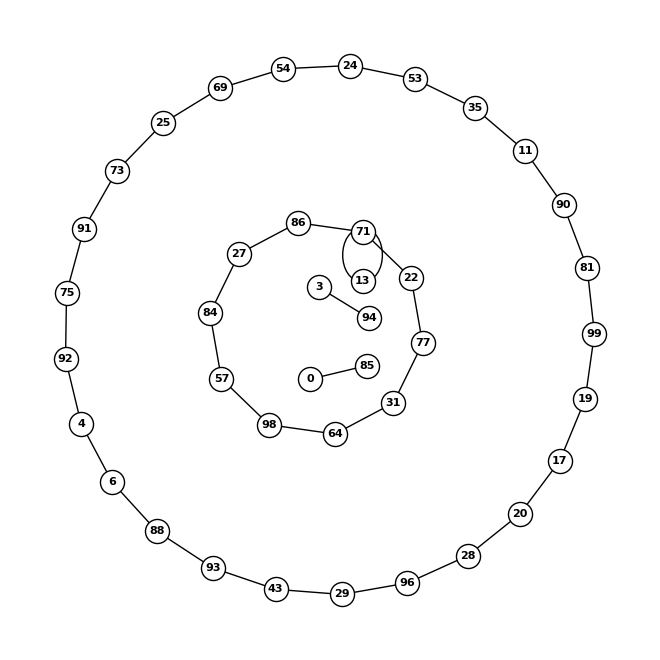

(528, 528, 3) <class 'numpy.ndarray'>


In [6]:
# example
nodes0 = [94, 35, 31, 28, 17, 99, 13, 86, 69, 11, 75, 54, 4, 3, 90, 27, 29, 64,
         77, 92, 71, 25, 91, 53, 96, 57, 98, 0, 20, 88, 43, 73, 19, 84, 81, 93,
         85, 24, 6, 22]
edges0 = [(91, 75), (6, 88), (29, 96), (31, 64), (88, 93), (81, 90), (86, 71),
         (96, 28), (99, 81), (64, 98), (11, 35), (98, 57), (71, 22), (92, 4),
         (54, 69), (77, 31), (13, 13), (22, 77), (85, 0), (35, 53), (84, 27),
         (93, 43), (25, 73), (20, 17), (28, 20), (53, 24), (17, 19), (24, 54),
         (75, 92), (73, 91), (43, 29), (57, 84), (69, 25), (0, 85), (4, 6),
         (19, 99), (94, 3), (3, 94), (27, 86), (90, 11)]
path0 = graph_to_image(nodes0, edges0, 0)
arr0 = image_to_vectors(path0)
print(arr0.shape, type(arr0)) # we generate a image array with shape (528, 528, 3)

In [ ]:
!apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

In [10]:
from networkx.drawing.nx_agraph import graphviz_layout

# nx.nx_pydot.graphviz_layout(G) graph layout sample

In [15]:
"""
Generate a image(528, 528, 3) corresponding to input graph(nodes, edges)
nodes(list): all nodes in a graph, randomly assigned in range [0, 100)
edges(list): all edges in a graph with the given nodes
img_number(int): denote the img_number-th image would be generated
            <'gi' + img_number> is the name of the generated image
"""
def graph_to_image(nodes, edges, img_number):
  n = len(nodes)

  # Generate a graph
  G = nx.Graph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)

  """
  nx.circular_layout, nx.planar_layout, nx.kamada_kawai_layout work well for our problem.
  nx.planar_layout fits with our problem best but has an issue of edges crossing irelavant
  nodes. (All these three layouts have the problem.) nx.kamada_kawai_layout works the best
  in edges crossing irelavant nodes, but still has the problem when the there is
  self-pointing node.
  """
  #pos = nx.circular_layout(G, scale=1)
  #pos = nx.planar_layout(G)
  #pos = nx.kamada_kawai_layout(G)
  pos = nx.nx_pydot.graphviz_layout(G)

  # Draw the generated graph
  nx.draw(G, pos, with_labels=True, font_weight='bold',
          node_color='white', edgecolors='black', font_size=8, font_color='black',
          edge_color='black', linewidths=1)

  # Generate the figure
  fig = plt.gcf().set_size_inches(512/80, 512/80, forward=False)
  save_path = '/content/graph_images/gi' + str(img_number) +'.png'
  plt.savefig(save_path, format='png', dpi=80, bbox_inches='tight')

  # Show the plot, used for debug
  plt.show()
  return save_path

In [18]:
def gen_graphs(num):
  node_list = []
  edge_list = []
  random.seed(493) # change the random seed to generate diff graphs
  for i in range(num):
    n = random.randint(1, 40)
    m = random.randint(0, 80)
    nodes = random.sample(range(0, 100), n)
    edge_left = random.choices(nodes, k=m)
    edge_right = random.choices(nodes, k=m)
    edges = list(zip(edge_left, edge_right))
    print("n:", n, " m:", m)
    print("nodes:", nodes)
    print("edges:", edges)
    node_list.append(nodes)
    edge_list.append(edges)
  return node_list, edge_list

n: 17  m: 38
nodes: [74, 32, 45, 64, 78, 85, 43, 63, 5, 33, 27, 79, 38, 36, 30, 72, 65]
edges: [(79, 45), (79, 64), (85, 74), (85, 79), (33, 79), (45, 45), (27, 32), (27, 72), (38, 65), (43, 43), (32, 85), (74, 65), (65, 78), (85, 78), (32, 78), (32, 74), (79, 5), (45, 33), (72, 79), (30, 64), (36, 38), (72, 79), (32, 78), (79, 74), (65, 65), (79, 36), (79, 5), (65, 78), (78, 33), (38, 33), (27, 79), (72, 36), (43, 64), (85, 27), (33, 72), (33, 85), (36, 5), (65, 43)]
n: 1  m: 30
nodes: [84]
edges: [(84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84)]
n: 11  m: 0
nodes: [61, 32, 53, 14, 5, 49, 87, 45, 83, 42, 62]
edges: []
n: 7  m: 72
nodes: [9, 87, 69, 27, 4, 17, 10]
edges: [(4, 17), (87, 17), (9, 87), (69, 17), (10, 4), (69, 27), (69, 87), (

<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


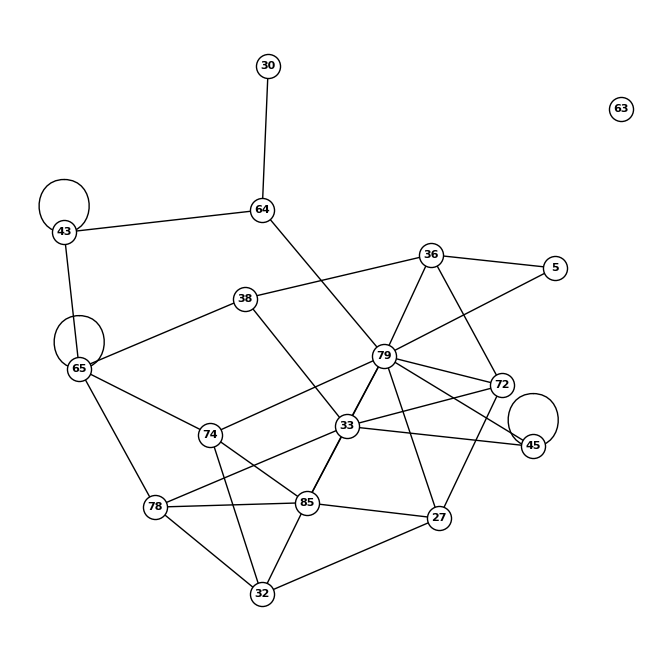

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


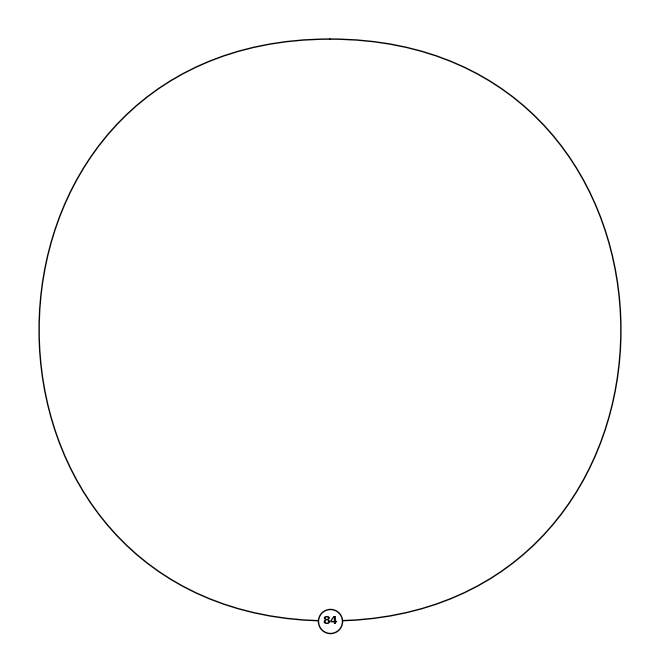

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


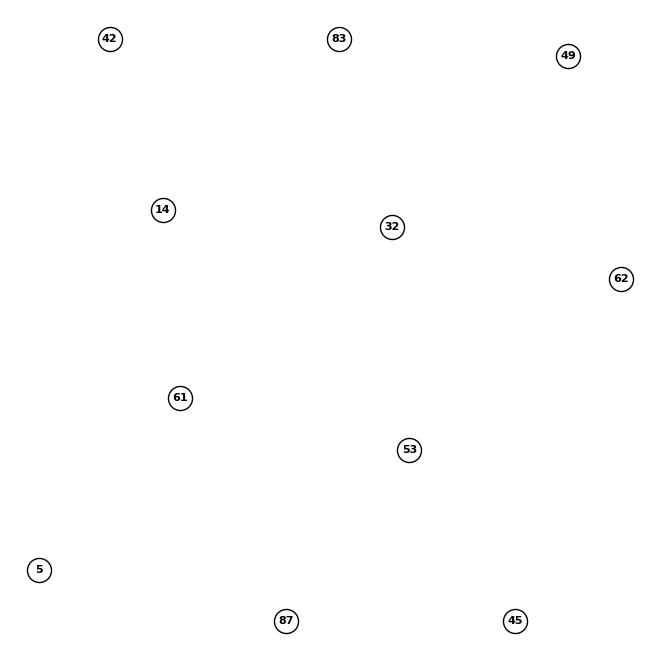

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


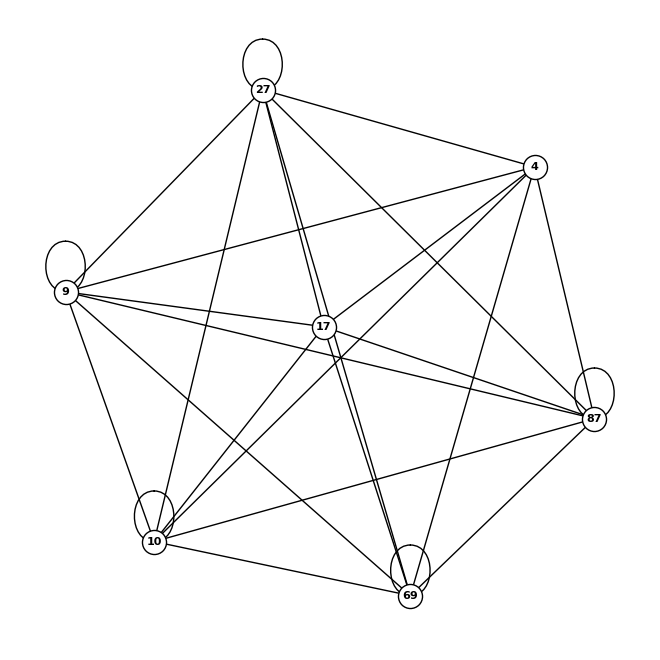

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


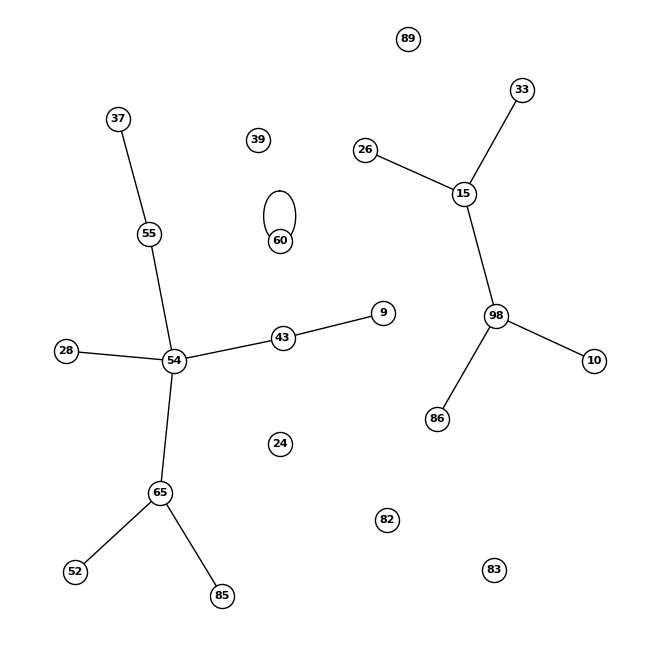

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


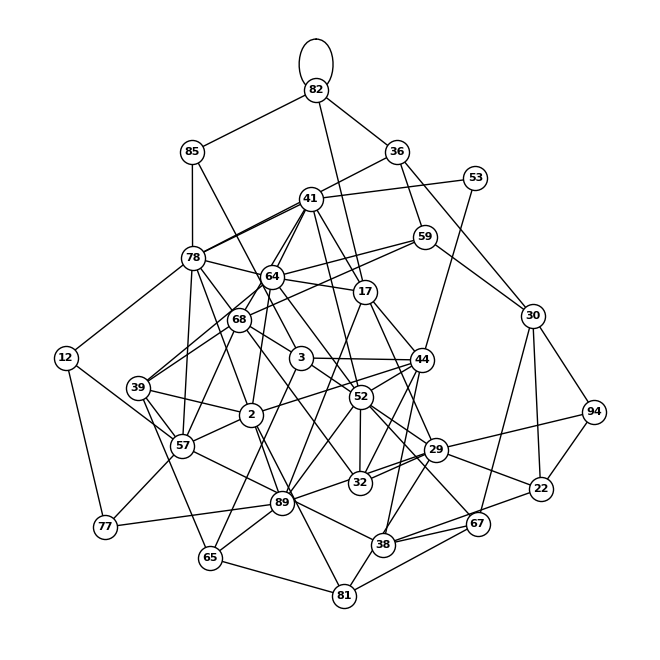

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


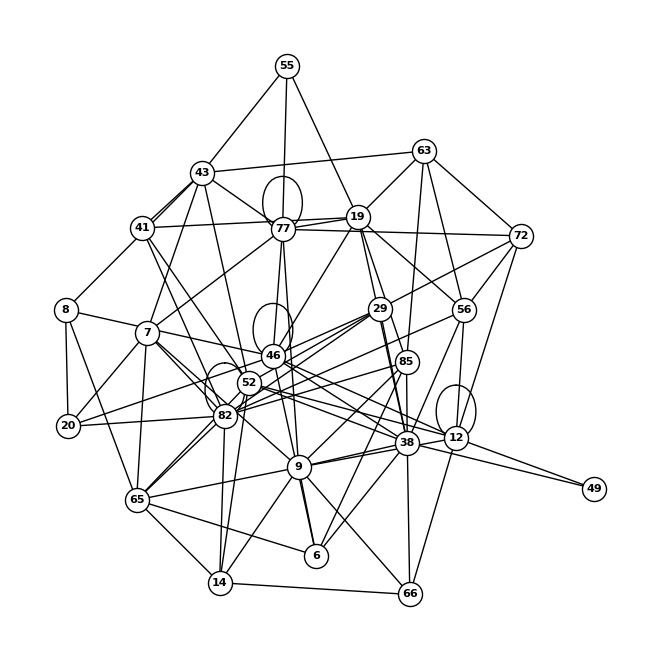

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


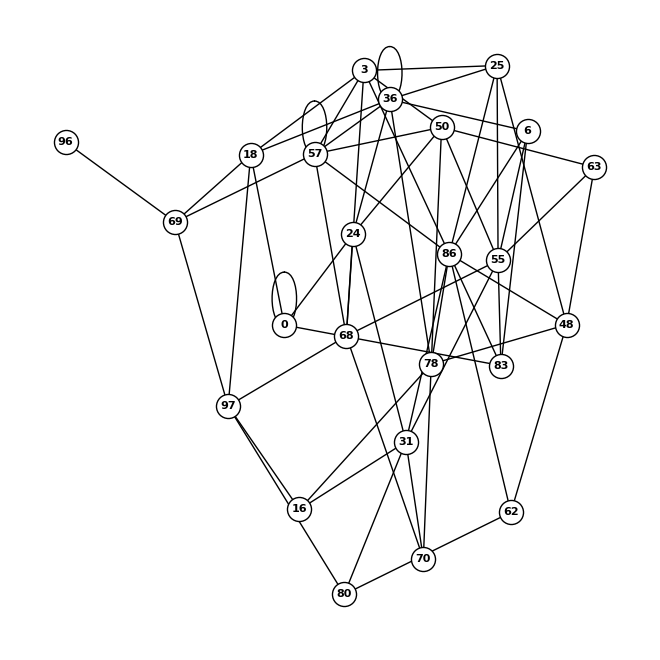

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


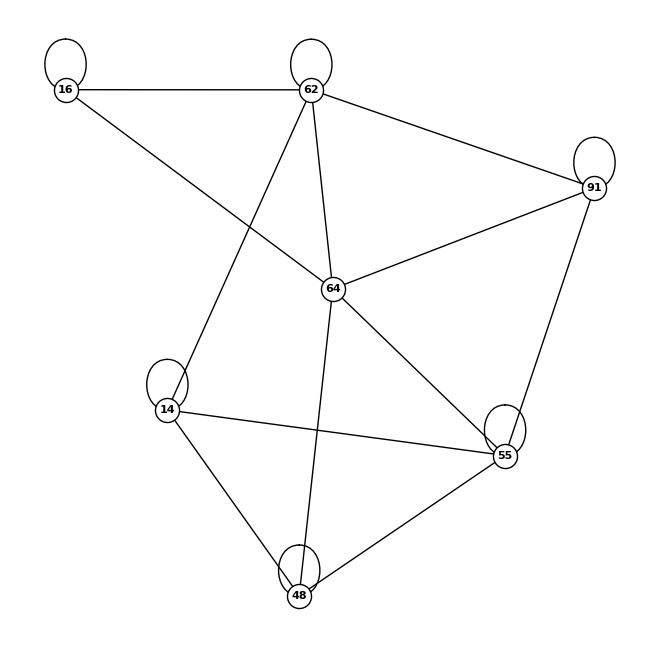

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


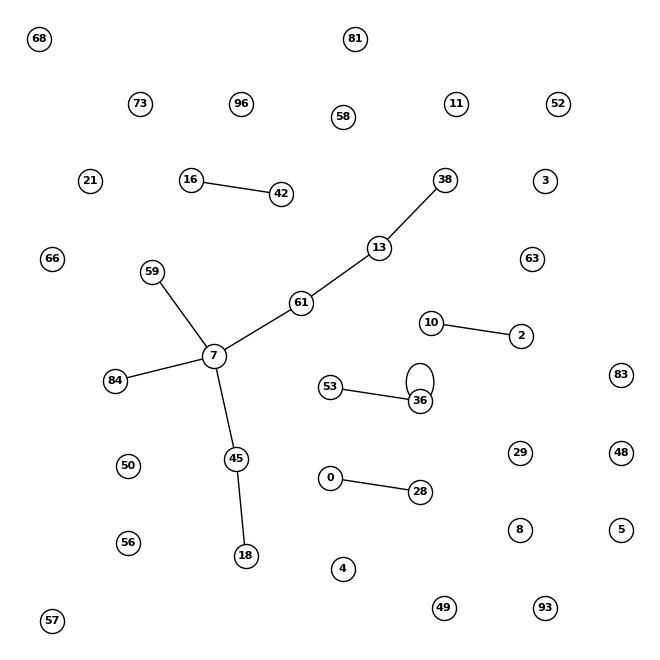

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


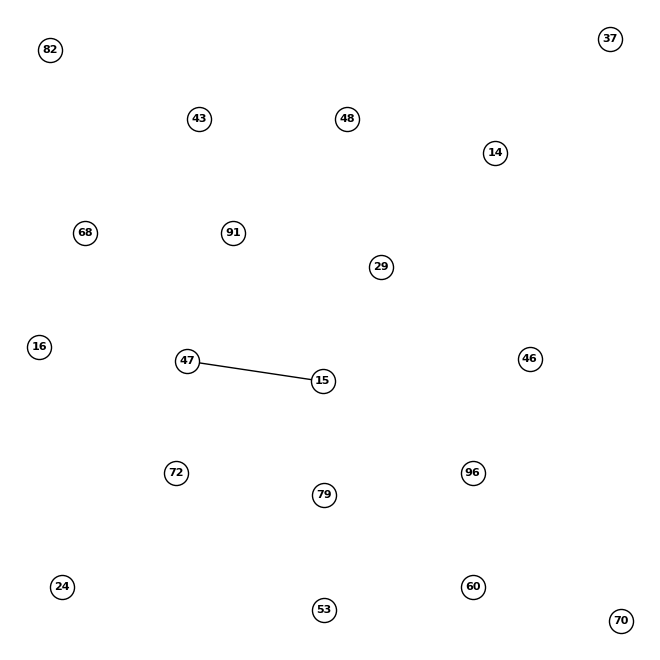

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


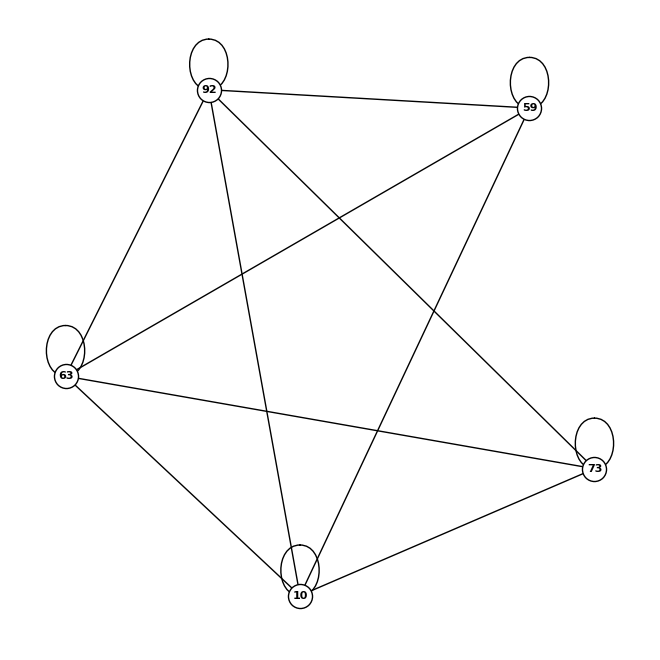

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


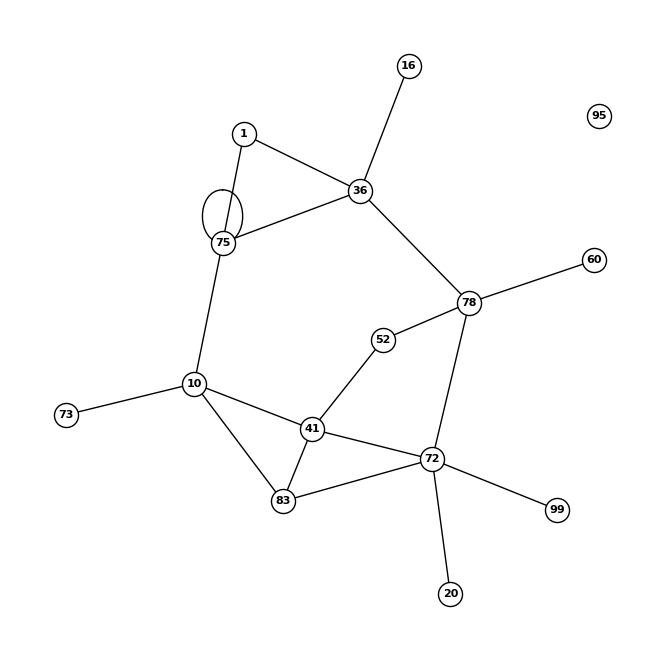

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


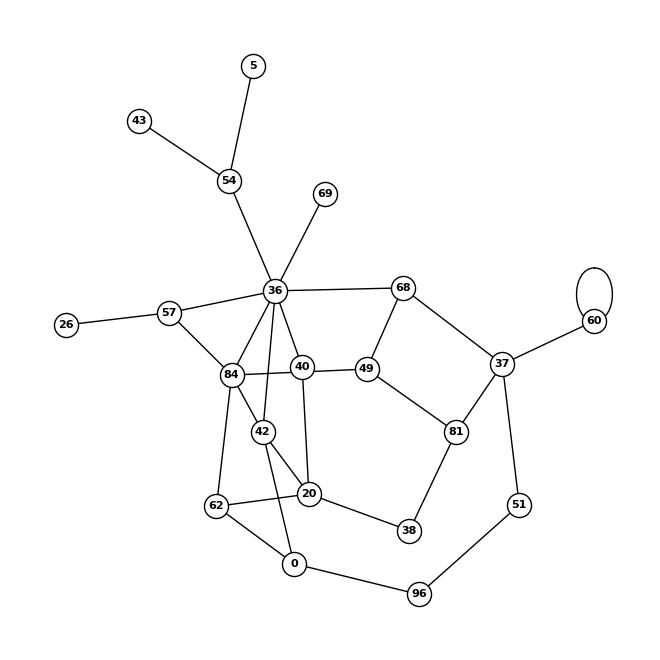

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


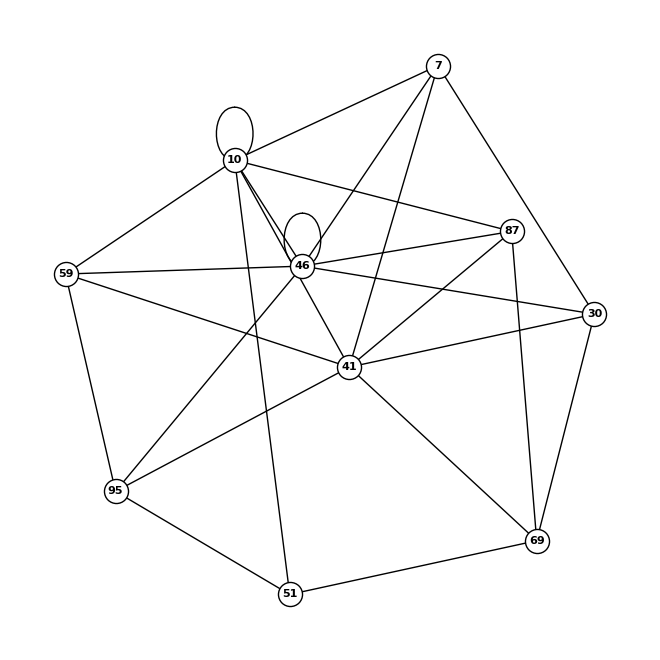

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


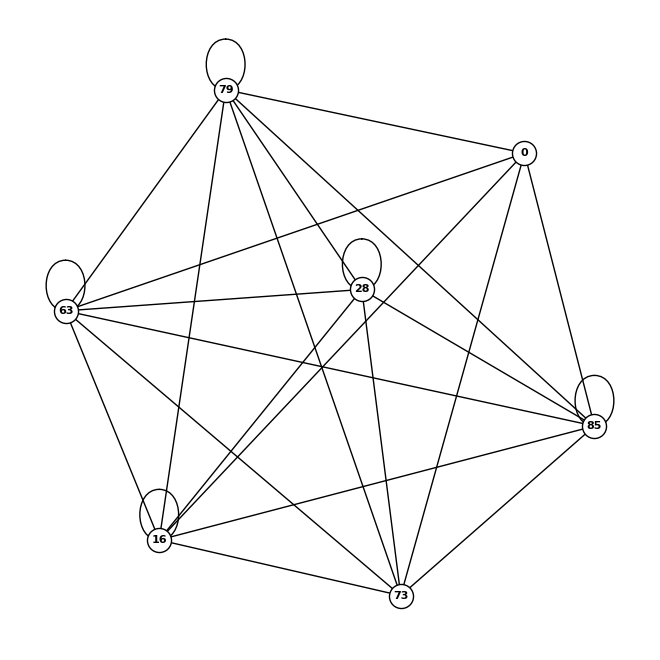

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


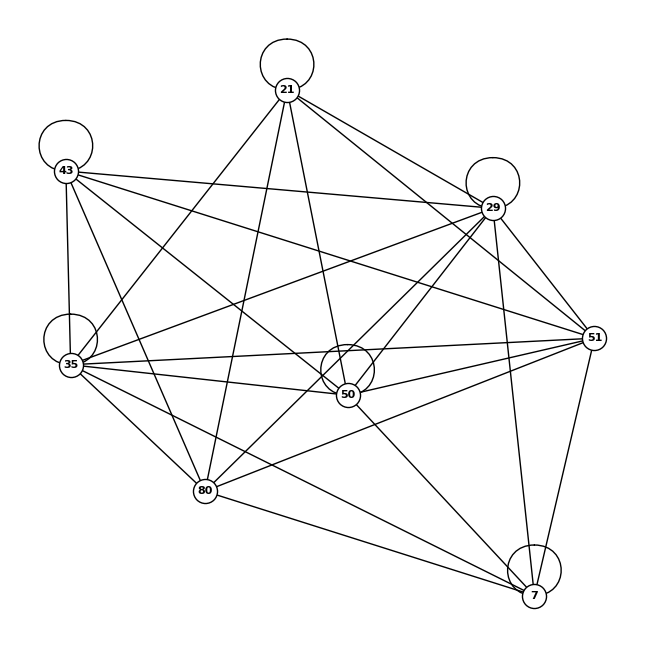

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


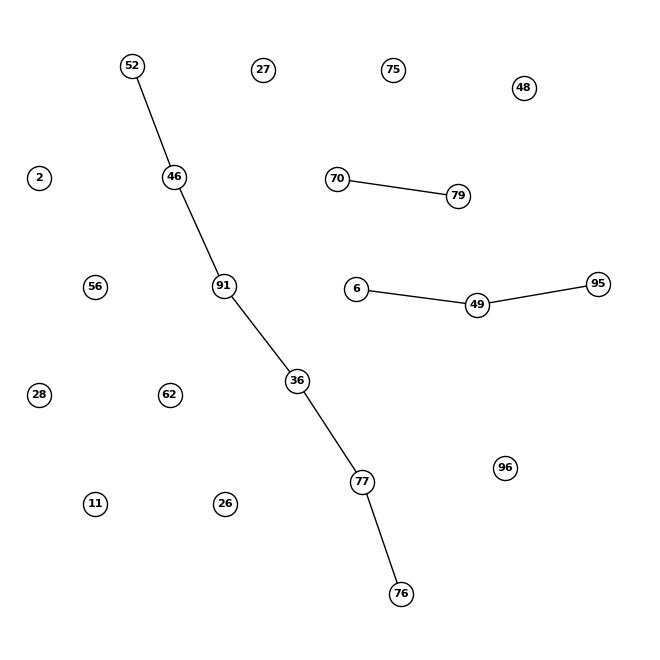

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


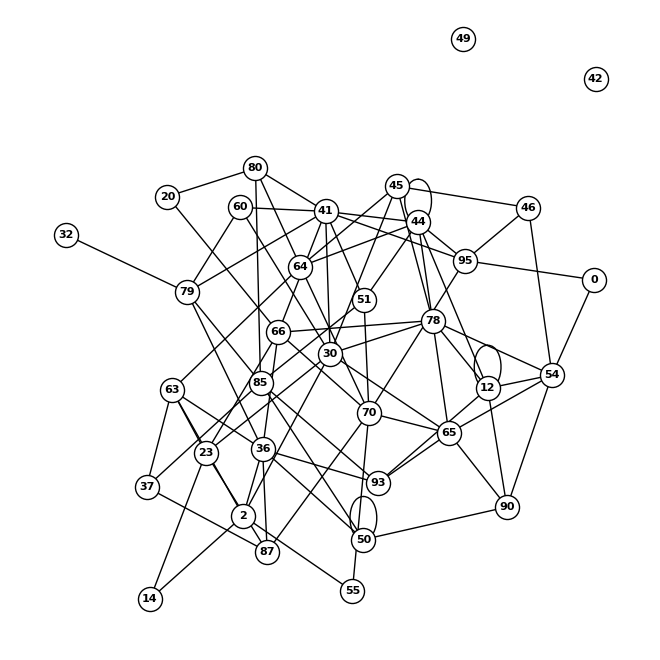

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


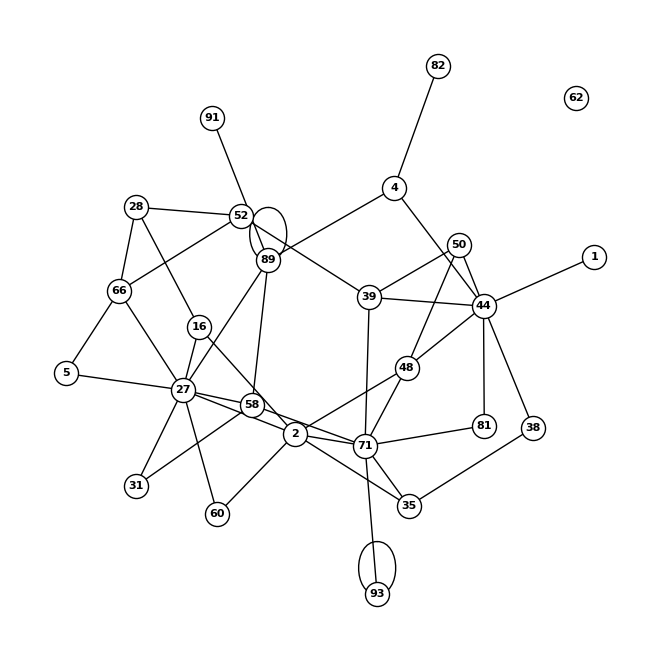

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


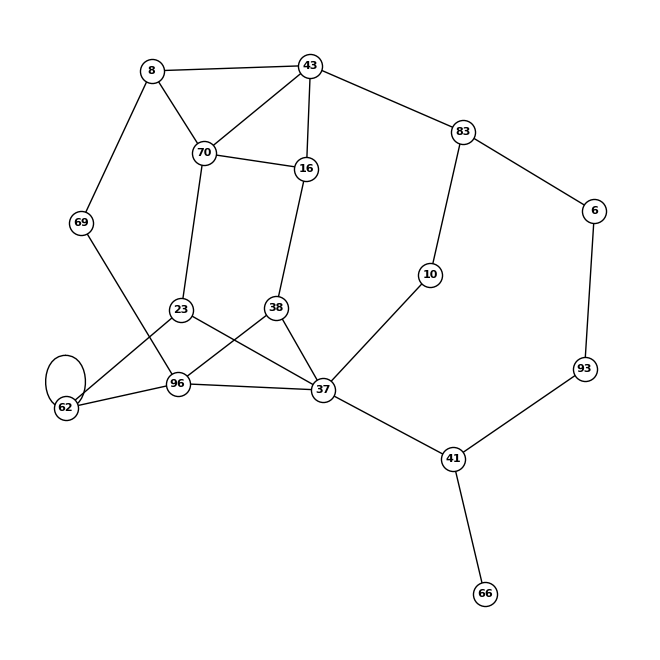

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


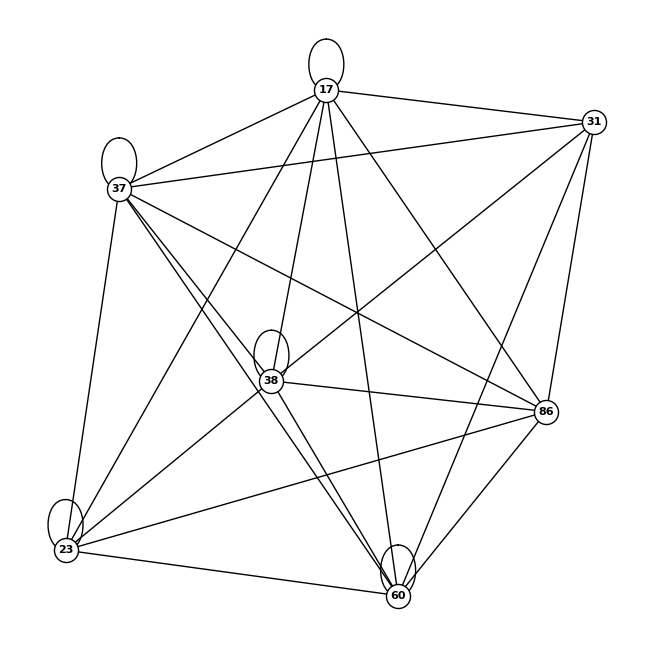

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


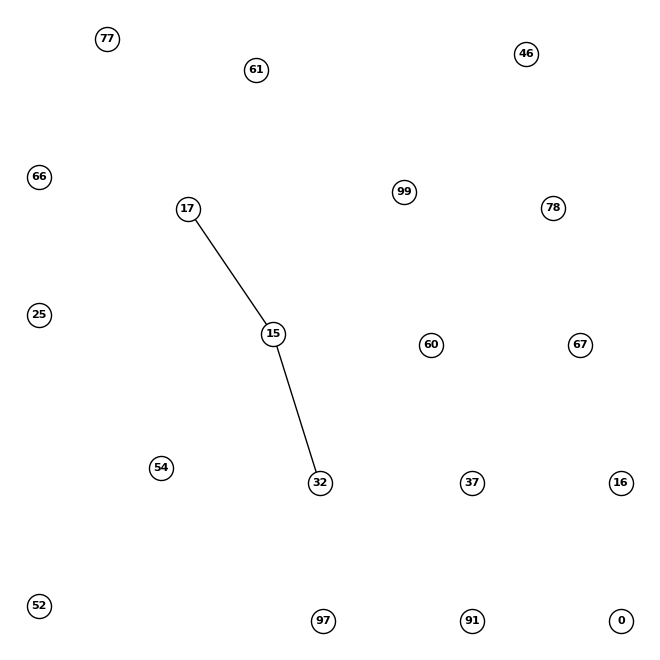

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


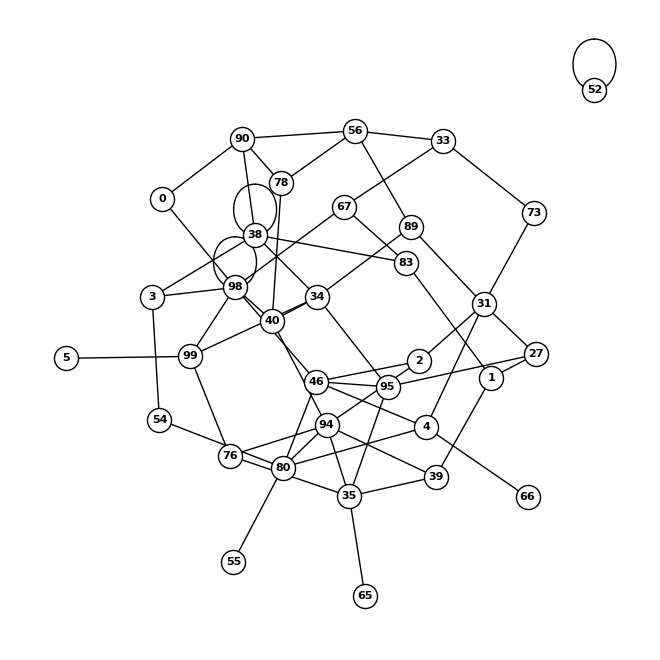

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


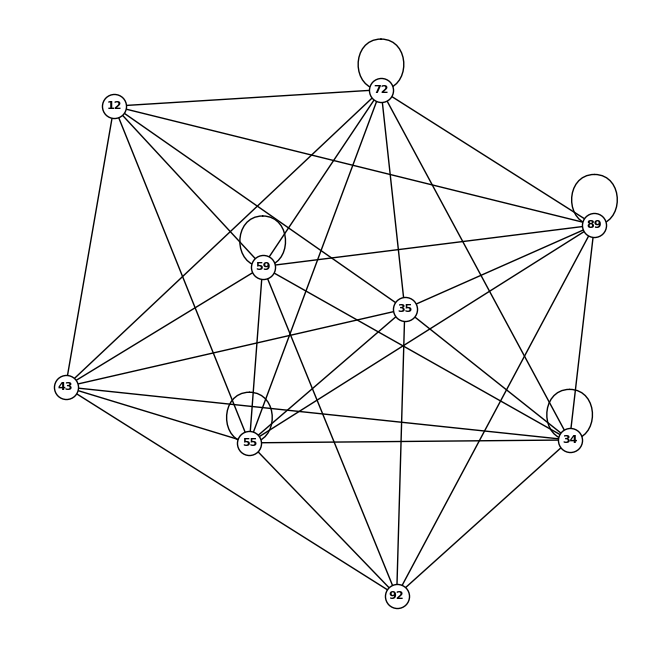

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


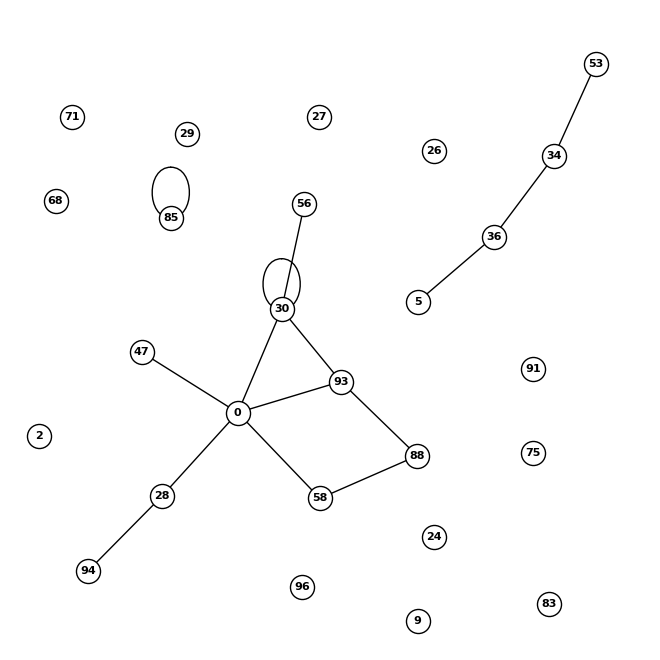

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


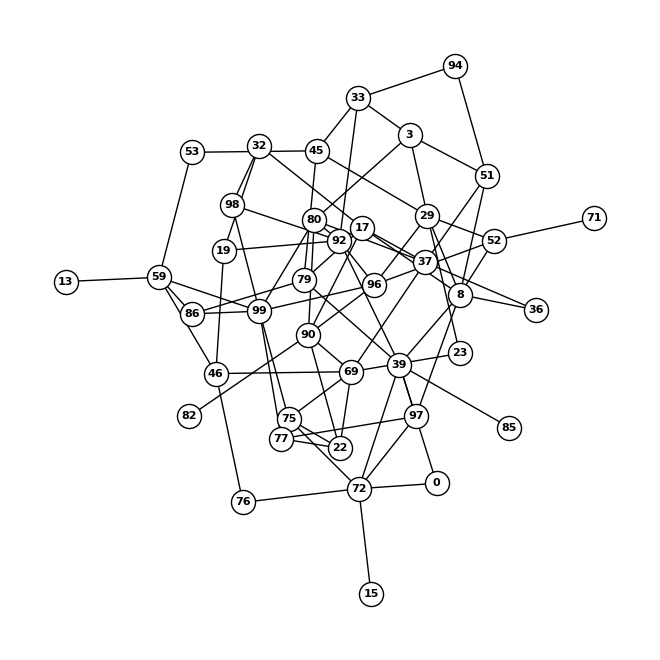

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


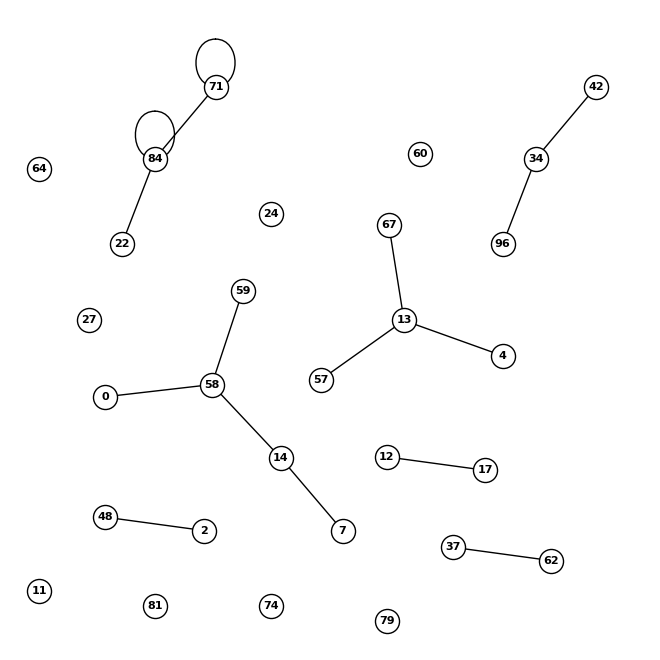

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


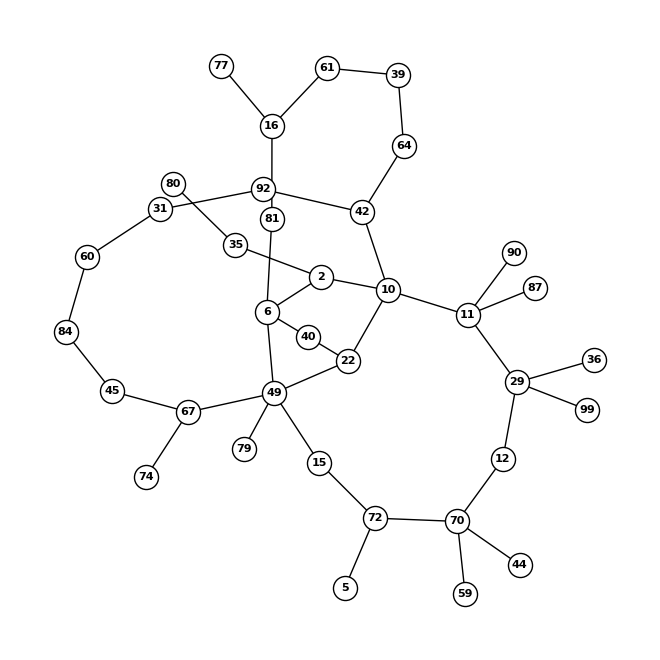

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


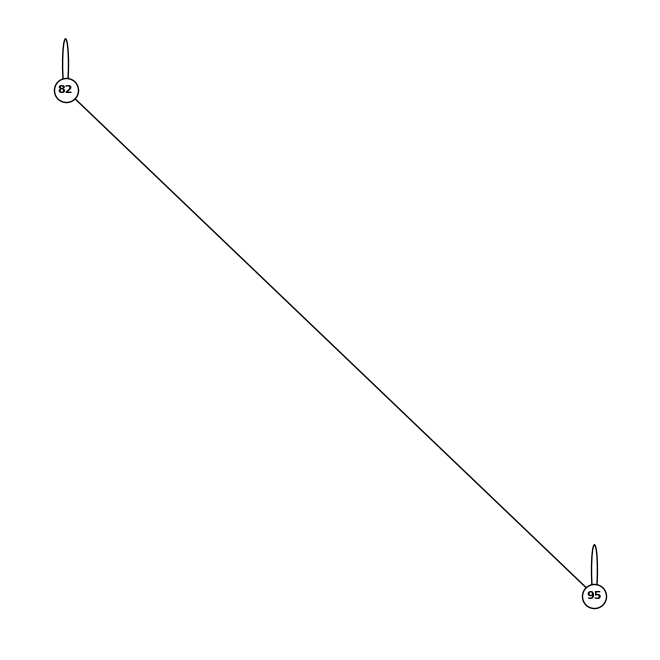

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


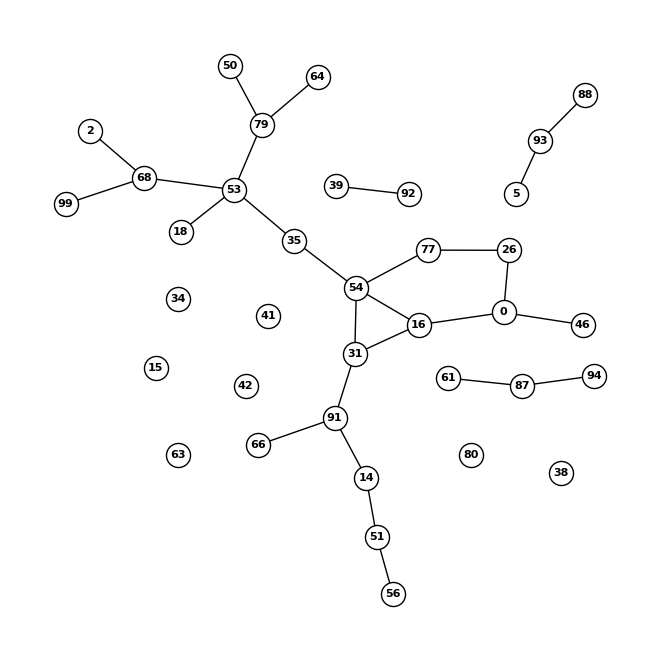

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


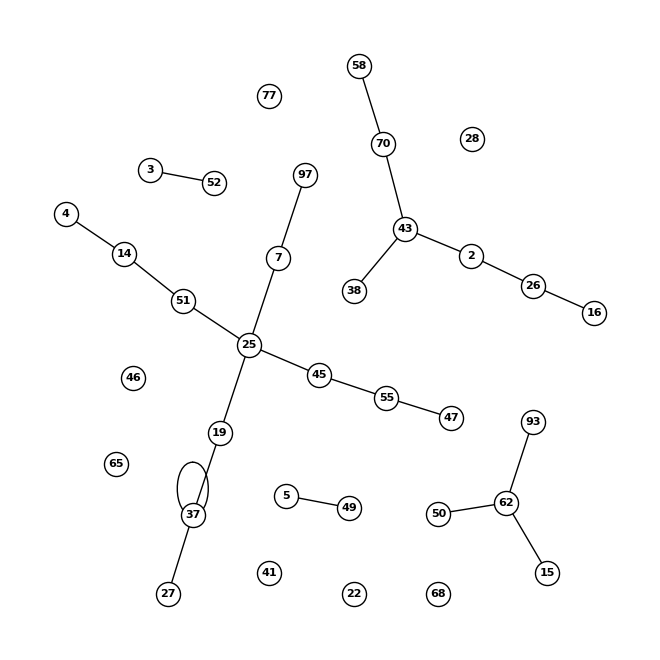

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


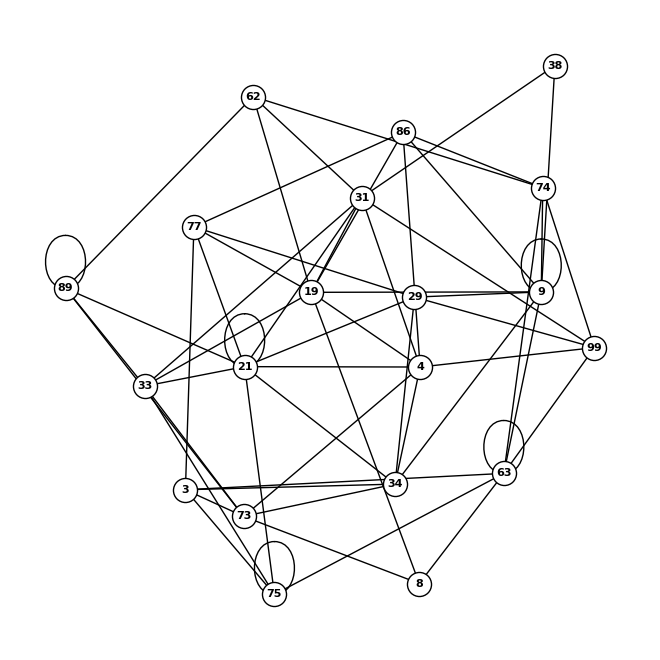

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


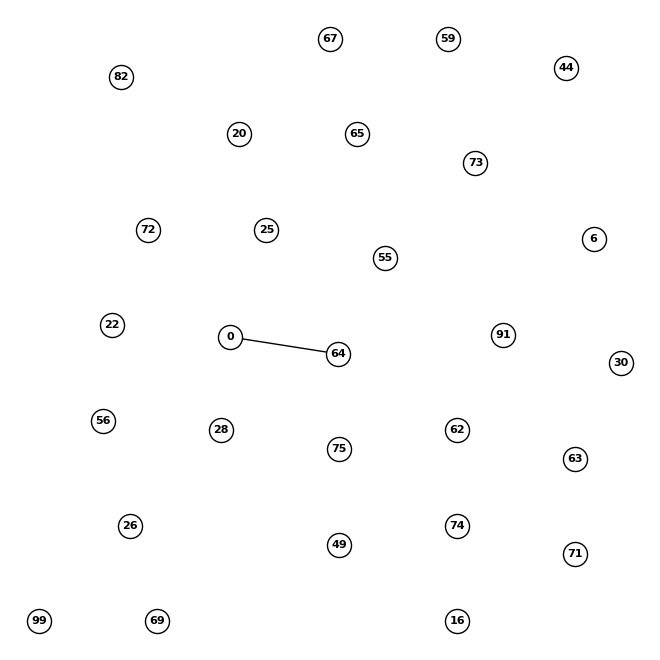

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


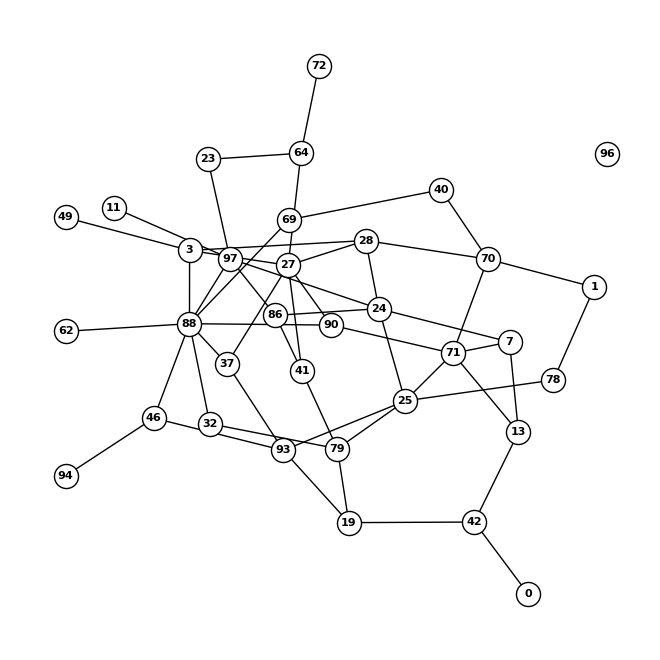

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


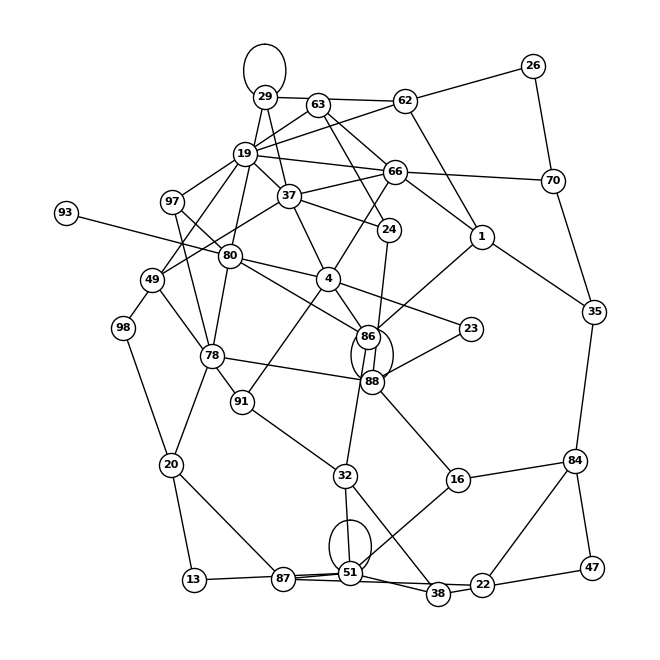

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


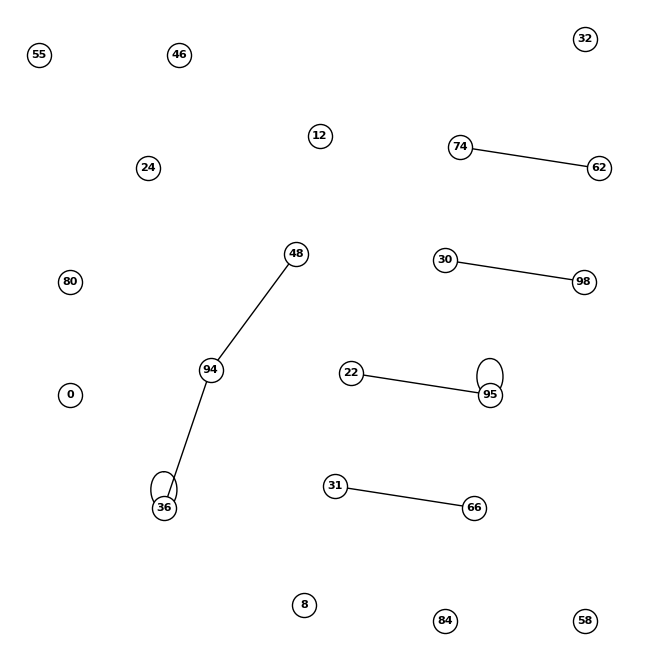

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


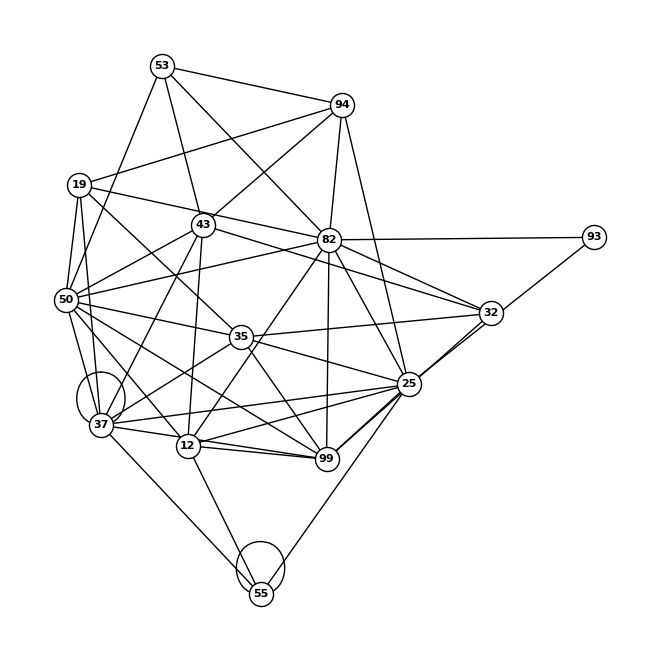

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


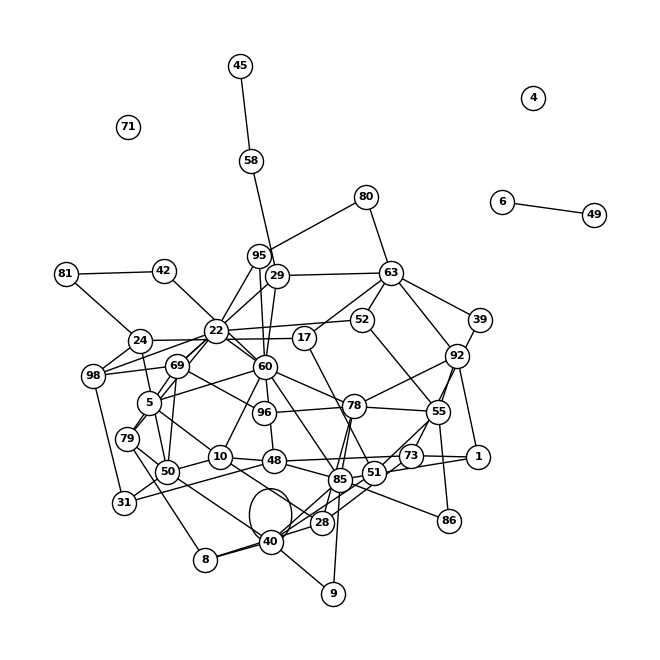

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


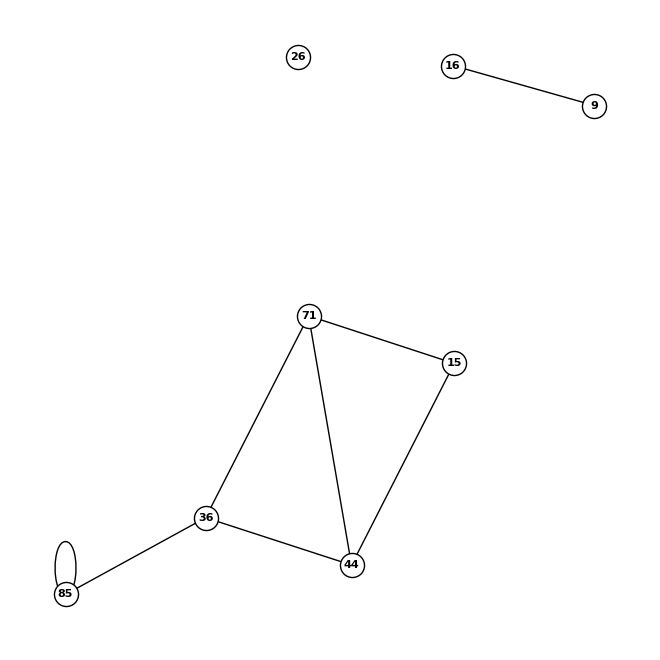

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


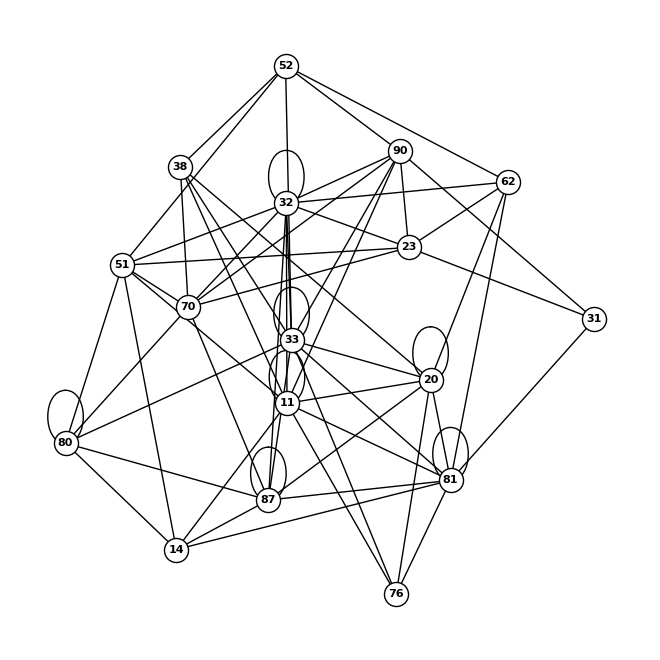

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


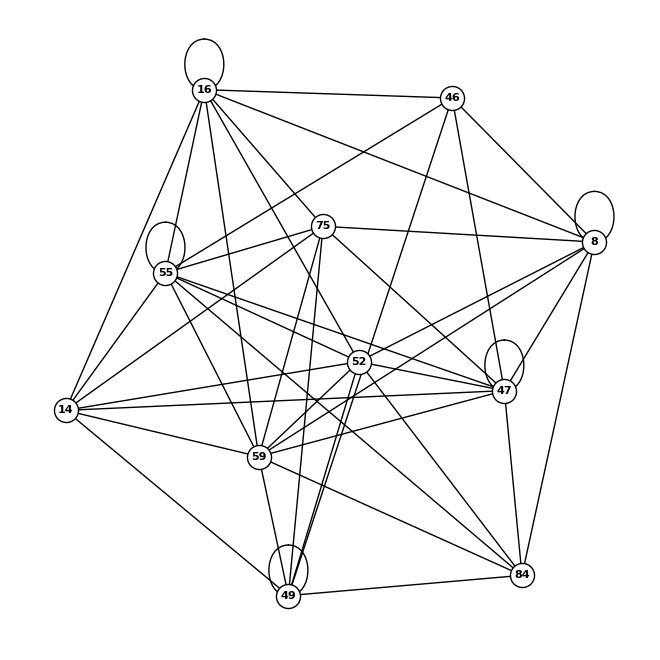

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


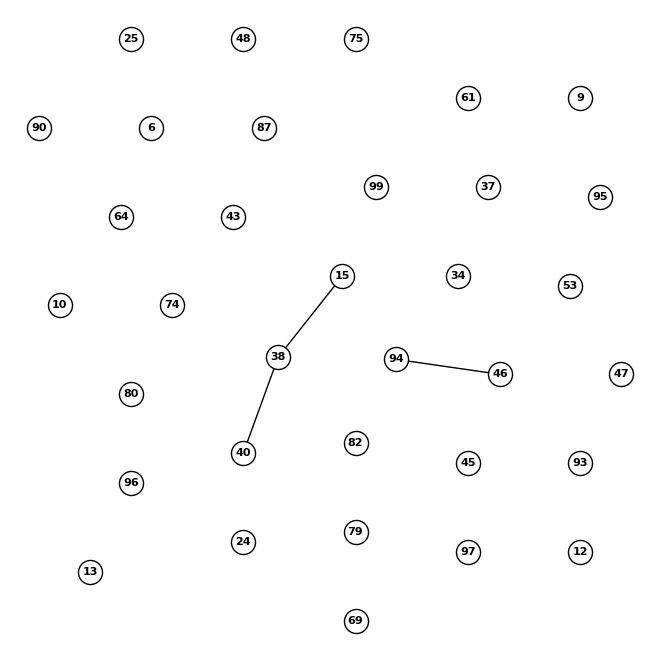

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


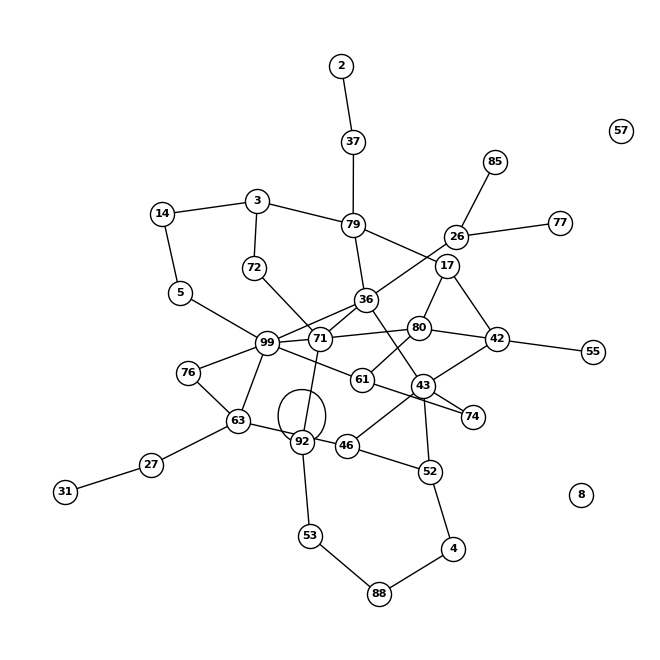

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


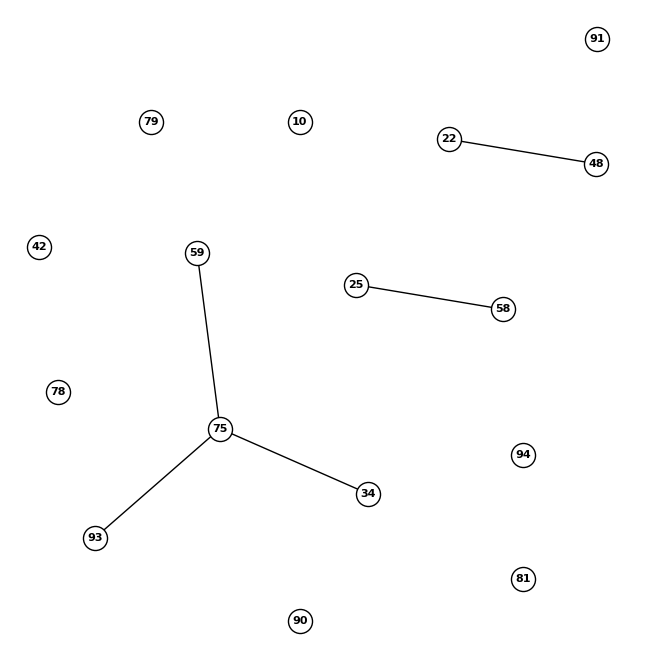

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


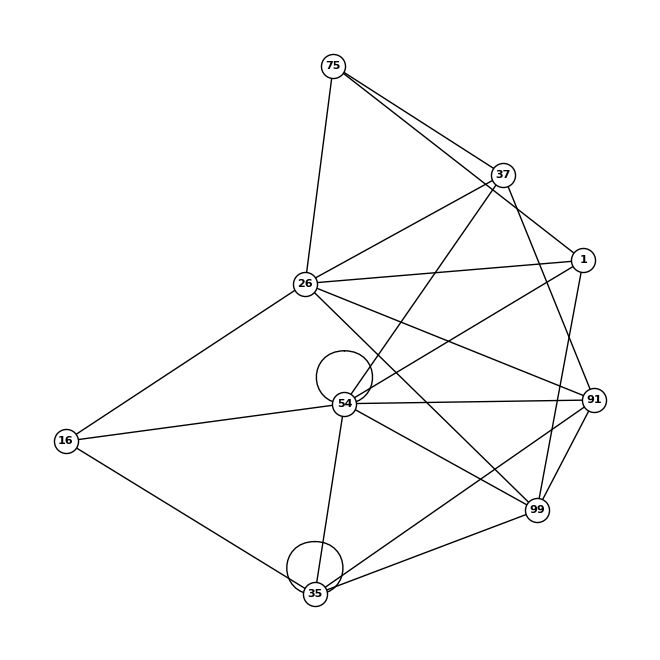

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


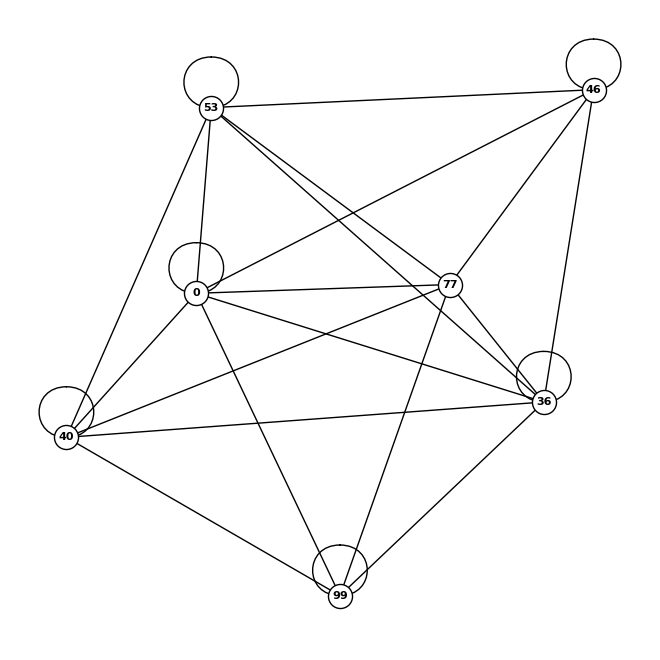

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


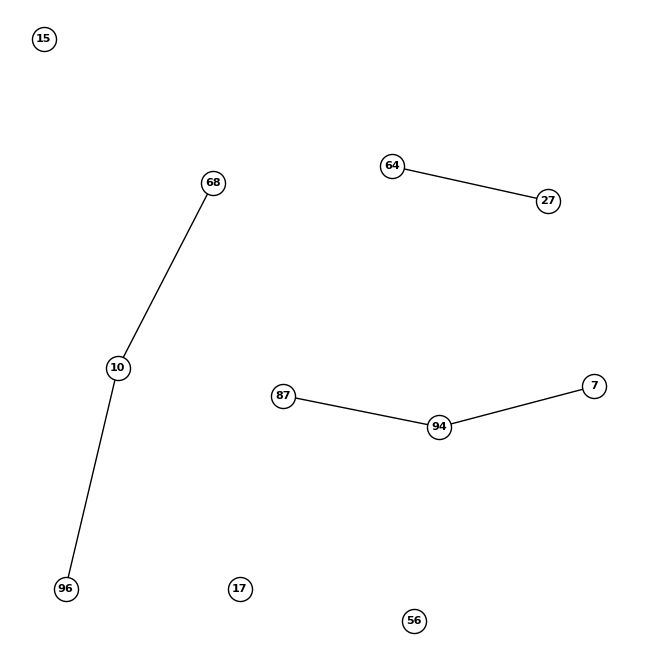

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


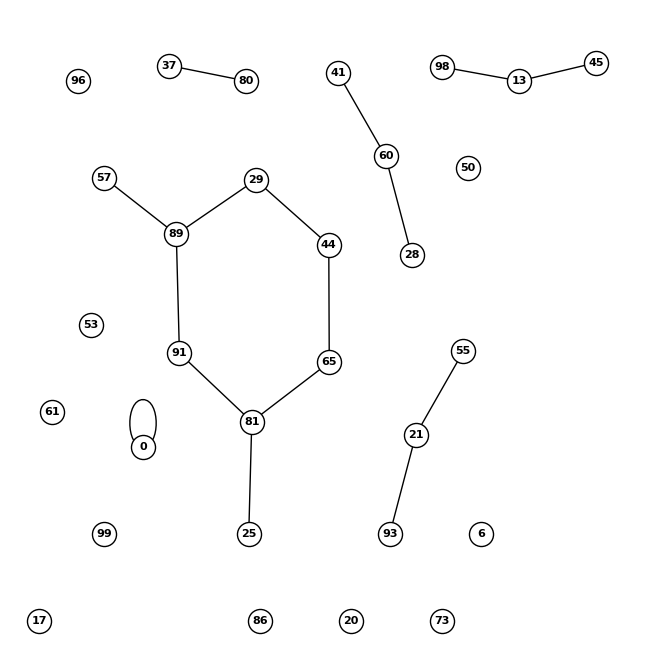

(528, 528, 3) <class 'numpy.ndarray'>


<ipython-input-15-8e18e3f15bd6>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


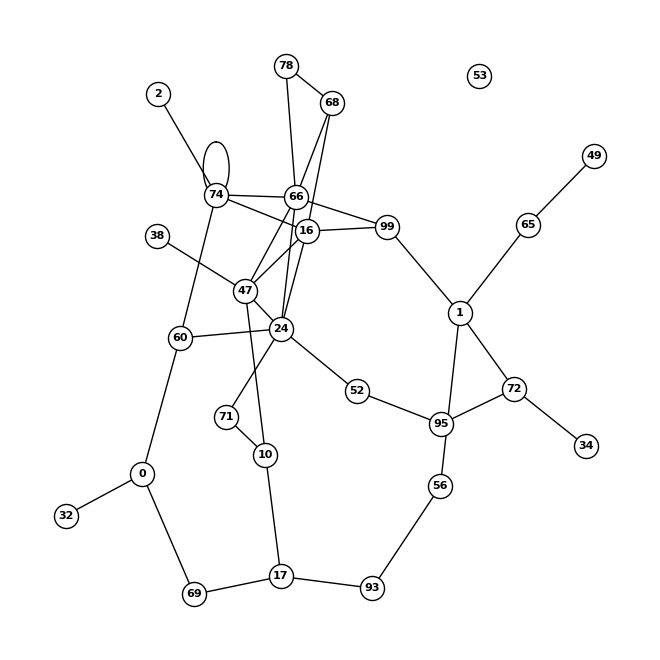

(528, 528, 3) <class 'numpy.ndarray'>


In [17]:
nodes, edges = gen_graphs(50)
for i in range(len(nodes)):
  n = nodes[i]
  e = edges[i]
  path = graph_to_image(n, e, 0)
  arr = image_to_vectors(path)
  print(arr.shape, type(arr))

# Next is Kamada Kawai

In [19]:
"""
Generate a image(528, 528, 3) corresponding to input graph(nodes, edges)
nodes(list): all nodes in a graph, randomly assigned in range [0, 100)
edges(list): all edges in a graph with the given nodes
img_number(int): denote the img_number-th image would be generated
            <'gi' + img_number> is the name of the generated image
"""
def graph_to_image(nodes, edges, img_number):
  n = len(nodes)

  # Generate a graph
  G = nx.Graph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)

  """
  nx.circular_layout, nx.planar_layout, nx.kamada_kawai_layout work well for our problem.
  nx.planar_layout fits with our problem best but has an issue of edges crossing irelavant
  nodes. (All these three layouts have the problem.) nx.kamada_kawai_layout works the best
  in edges crossing irelavant nodes, but still has the problem when the there is
  self-pointing node.
  """
  #pos = nx.circular_layout(G, scale=1)
  #pos = nx.planar_layout(G)
  pos = nx.kamada_kawai_layout(G)
  #pos = nx.nx_pydot.graphviz_layout(G)

  # Draw the generated graph
  nx.draw(G, pos, with_labels=True, font_weight='bold',
          node_color='white', edgecolors='black', font_size=8, font_color='black',
          edge_color='black', linewidths=1)

  # Generate the figure
  fig = plt.gcf().set_size_inches(512/80, 512/80, forward=False)
  save_path = '/content/graph_images/gi' + str(img_number) +'.png'
  plt.savefig(save_path, format='png', dpi=80, bbox_inches='tight')

  # Show the plot, used for debug
  plt.show()
  return save_path

n: 17  m: 38
nodes: [74, 32, 45, 64, 78, 85, 43, 63, 5, 33, 27, 79, 38, 36, 30, 72, 65]
edges: [(79, 45), (79, 64), (85, 74), (85, 79), (33, 79), (45, 45), (27, 32), (27, 72), (38, 65), (43, 43), (32, 85), (74, 65), (65, 78), (85, 78), (32, 78), (32, 74), (79, 5), (45, 33), (72, 79), (30, 64), (36, 38), (72, 79), (32, 78), (79, 74), (65, 65), (79, 36), (79, 5), (65, 78), (78, 33), (38, 33), (27, 79), (72, 36), (43, 64), (85, 27), (33, 72), (33, 85), (36, 5), (65, 43)]
n: 1  m: 30
nodes: [84]
edges: [(84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84)]
n: 11  m: 0
nodes: [61, 32, 53, 14, 5, 49, 87, 45, 83, 42, 62]
edges: []
n: 7  m: 72
nodes: [9, 87, 69, 27, 4, 17, 10]
edges: [(4, 17), (87, 17), (9, 87), (69, 17), (10, 4), (69, 27), (69, 87), (

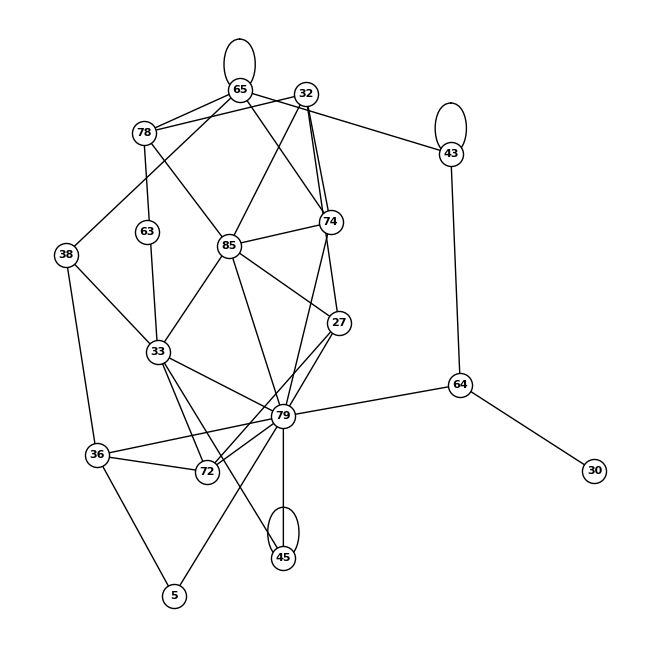

(528, 528, 3) <class 'numpy.ndarray'>


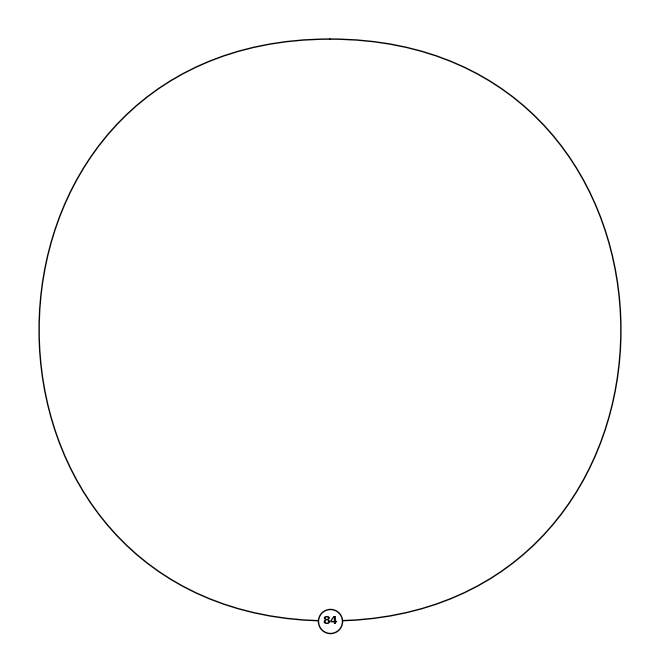

(528, 528, 3) <class 'numpy.ndarray'>


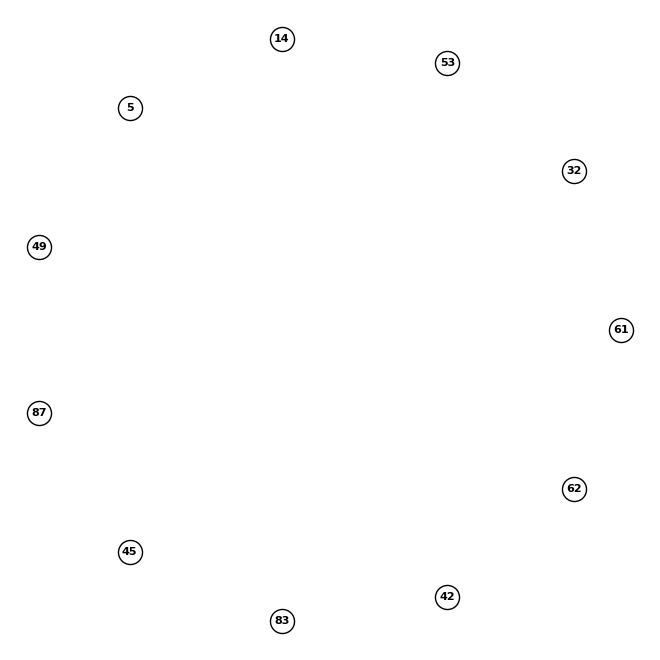

(528, 528, 3) <class 'numpy.ndarray'>


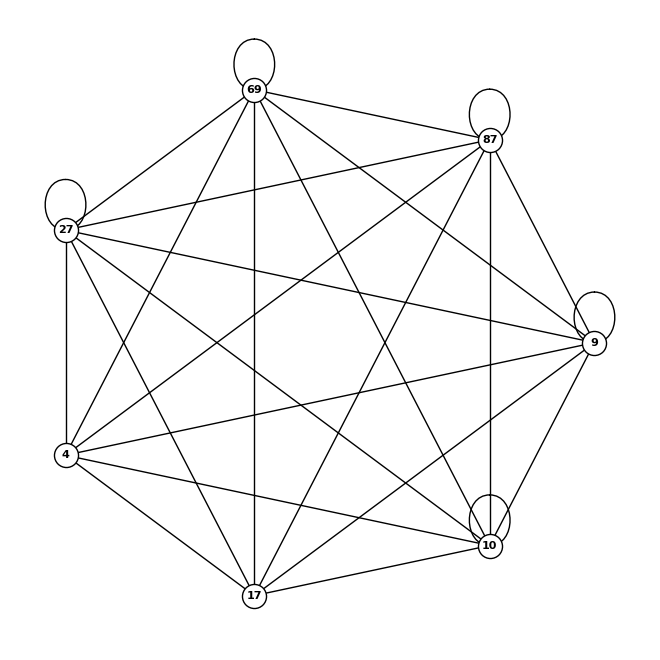

(528, 528, 3) <class 'numpy.ndarray'>


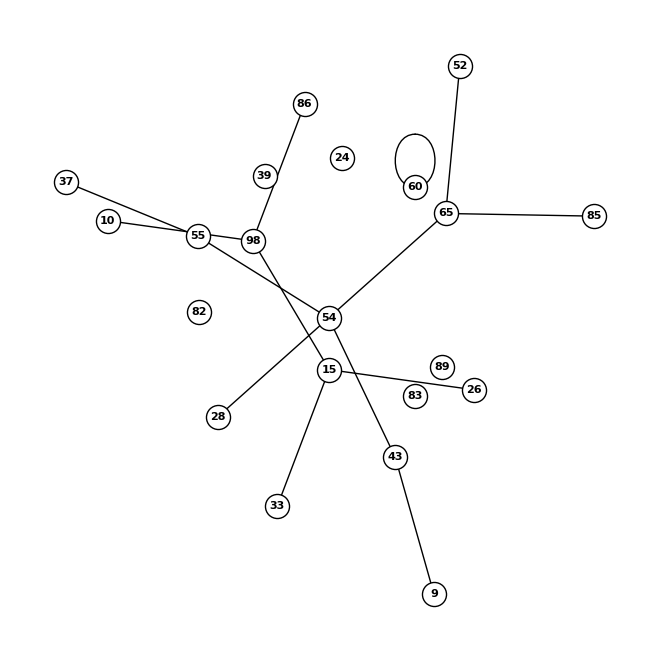

(528, 528, 3) <class 'numpy.ndarray'>


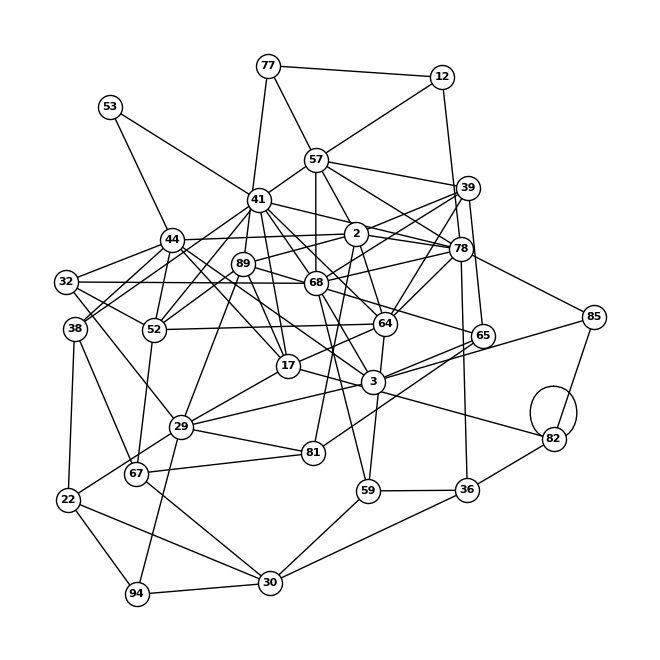

(528, 528, 3) <class 'numpy.ndarray'>


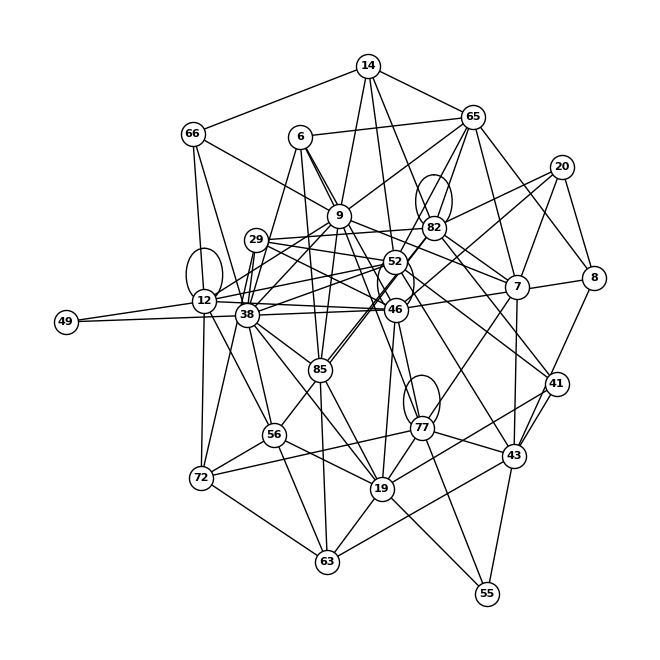

(528, 528, 3) <class 'numpy.ndarray'>


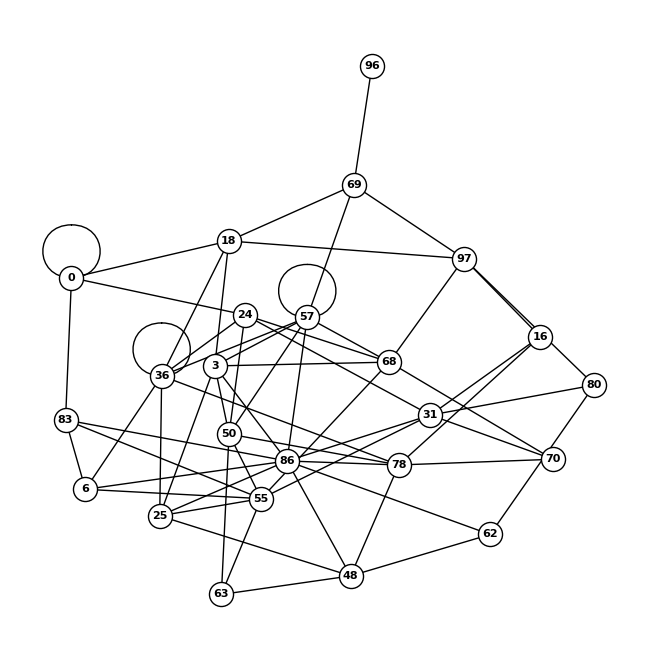

(528, 528, 3) <class 'numpy.ndarray'>


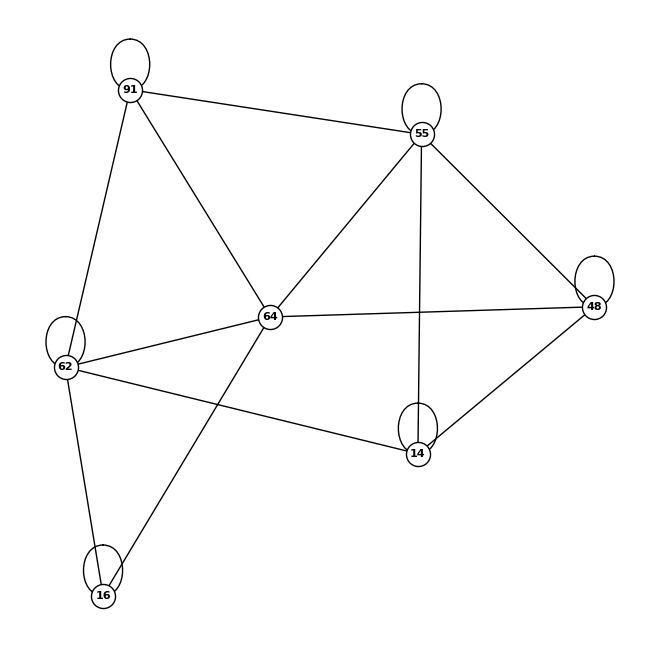

(528, 528, 3) <class 'numpy.ndarray'>


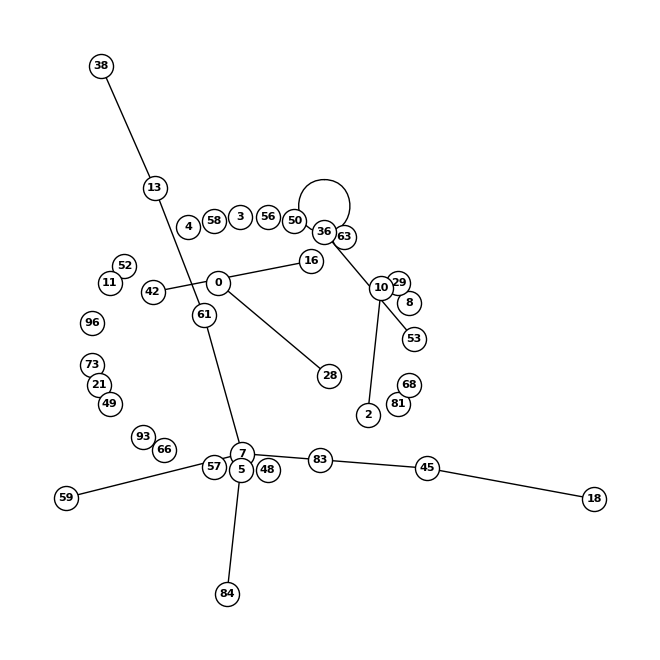

(528, 528, 3) <class 'numpy.ndarray'>


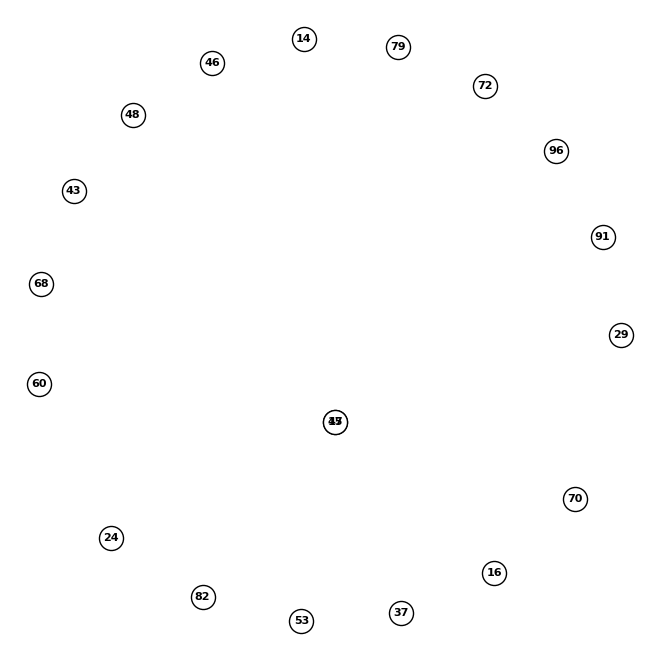

(528, 528, 3) <class 'numpy.ndarray'>


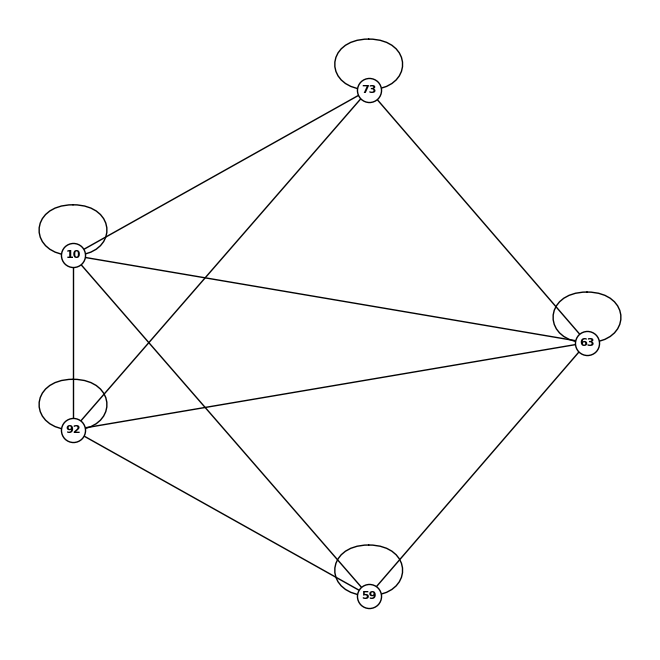

(528, 528, 3) <class 'numpy.ndarray'>


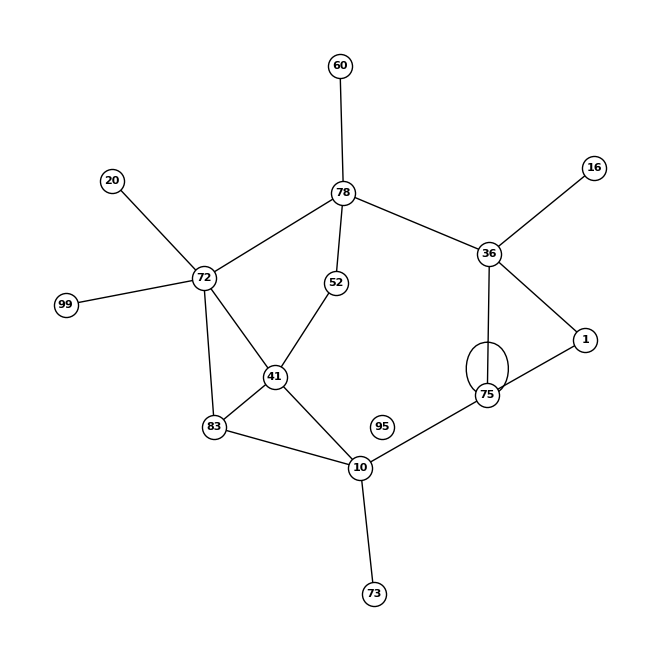

(528, 528, 3) <class 'numpy.ndarray'>


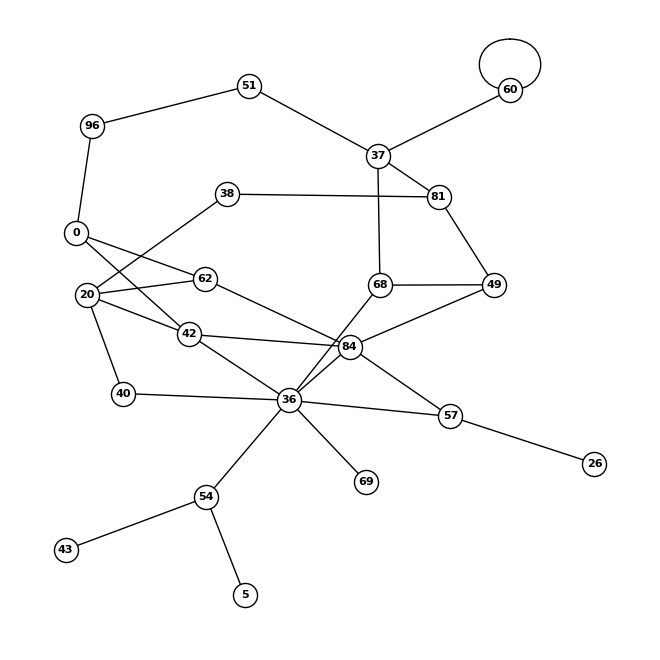

(528, 528, 3) <class 'numpy.ndarray'>


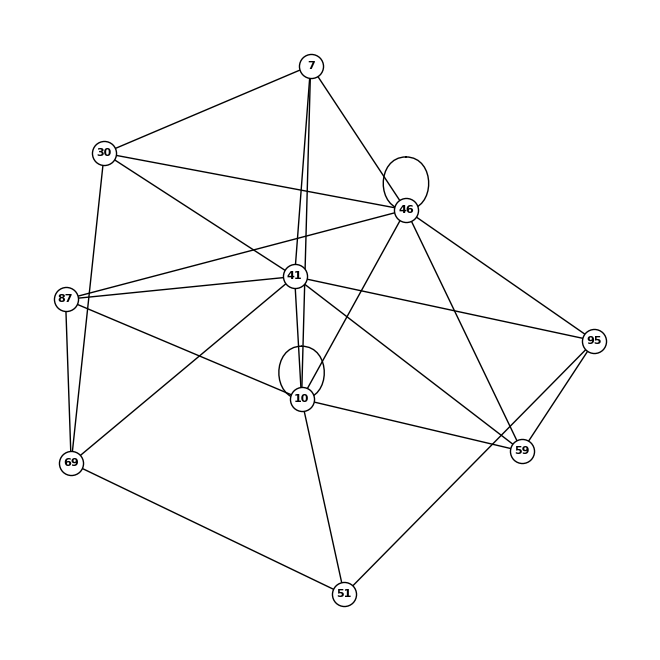

(528, 528, 3) <class 'numpy.ndarray'>


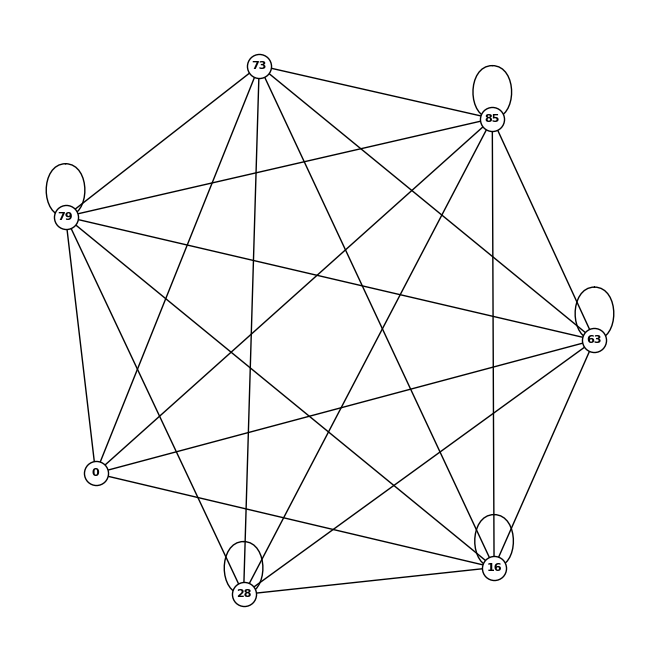

(528, 528, 3) <class 'numpy.ndarray'>


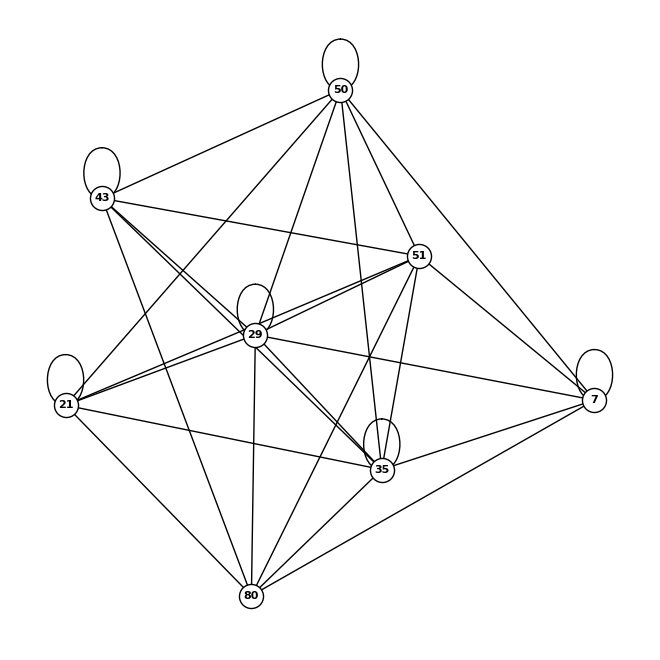

(528, 528, 3) <class 'numpy.ndarray'>


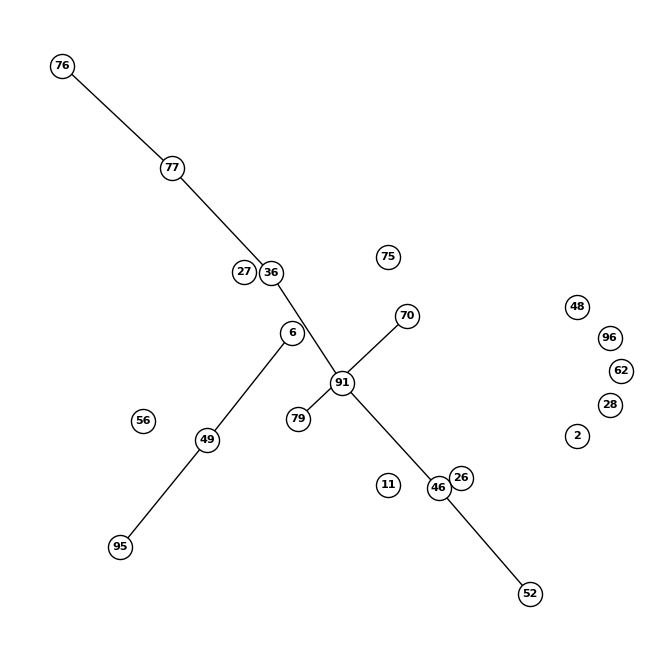

(528, 528, 3) <class 'numpy.ndarray'>


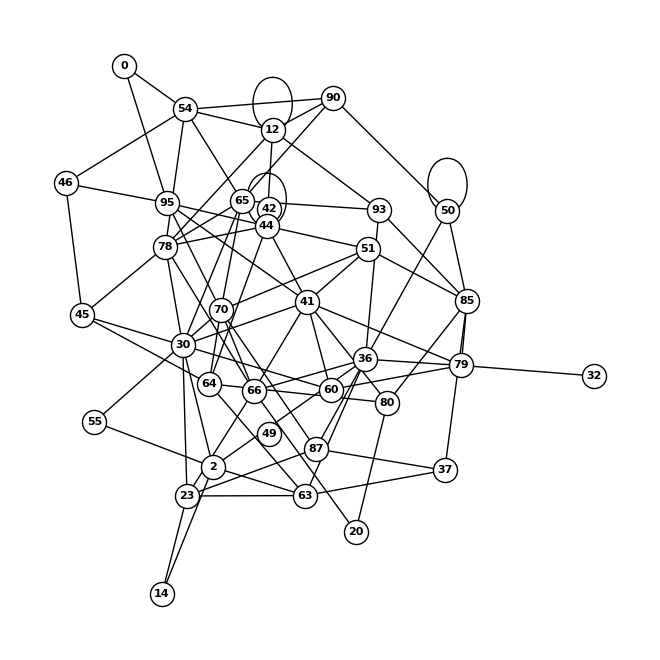

(528, 528, 3) <class 'numpy.ndarray'>


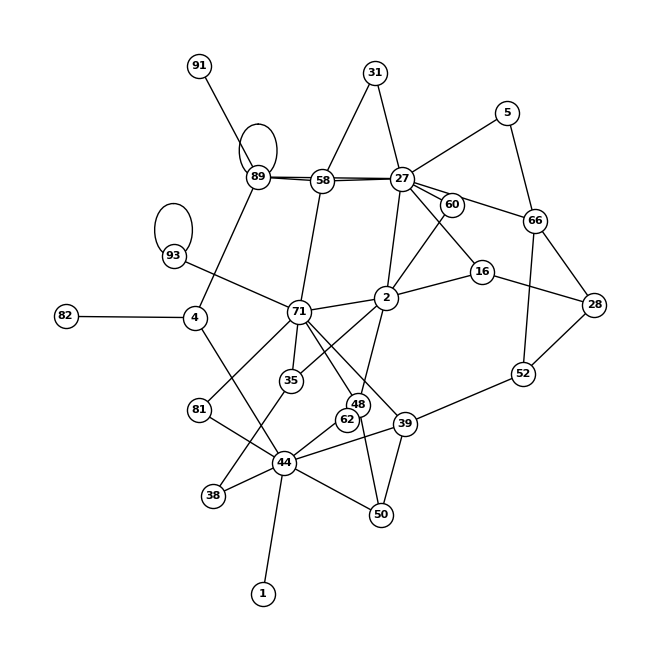

(528, 528, 3) <class 'numpy.ndarray'>


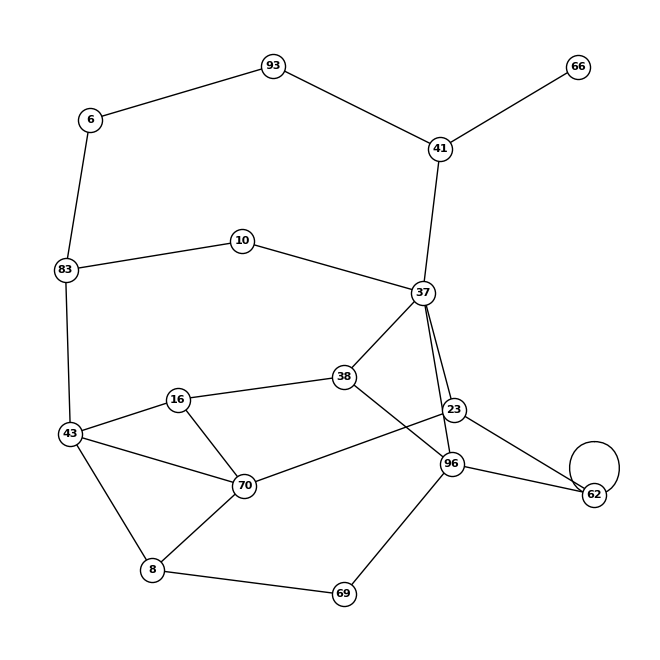

(528, 528, 3) <class 'numpy.ndarray'>


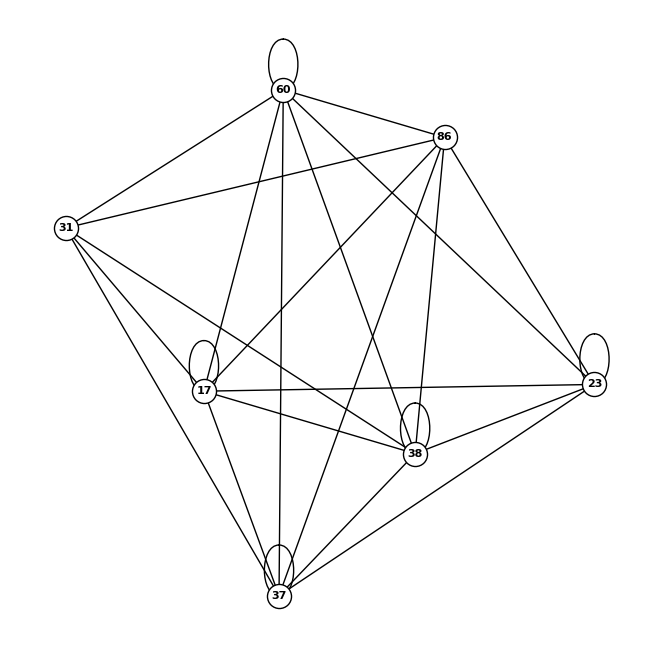

(528, 528, 3) <class 'numpy.ndarray'>


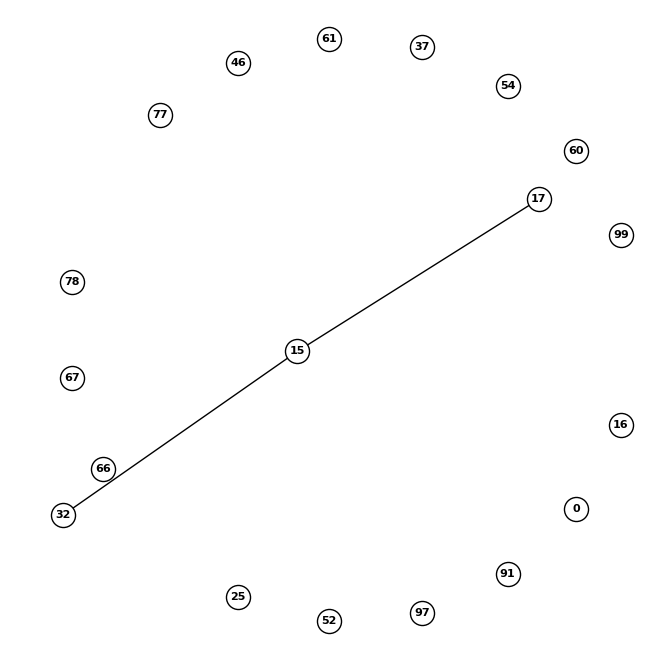

(528, 528, 3) <class 'numpy.ndarray'>


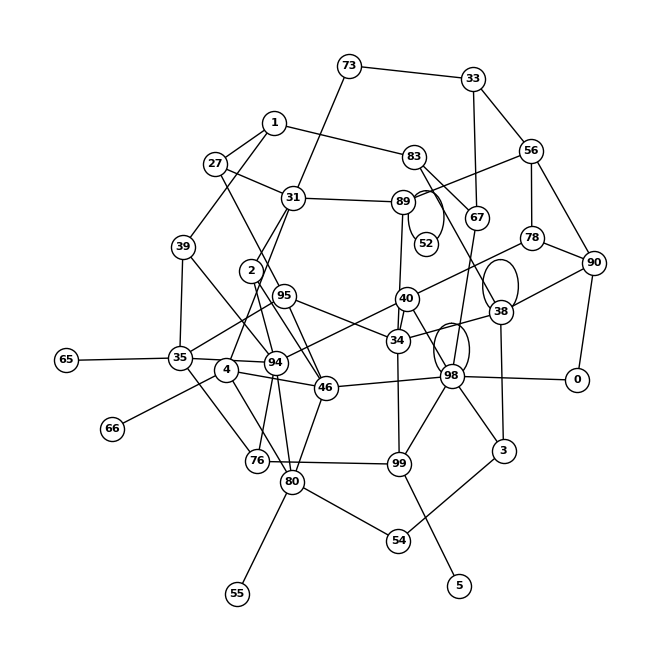

(528, 528, 3) <class 'numpy.ndarray'>


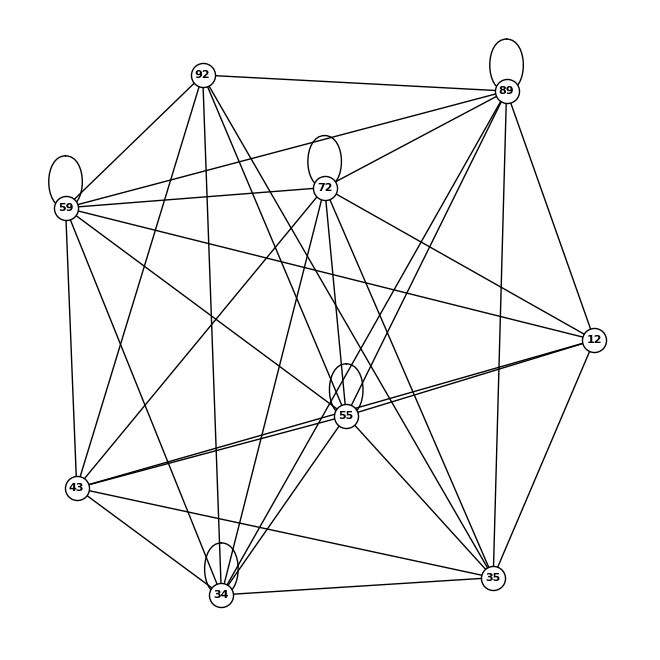

(528, 528, 3) <class 'numpy.ndarray'>


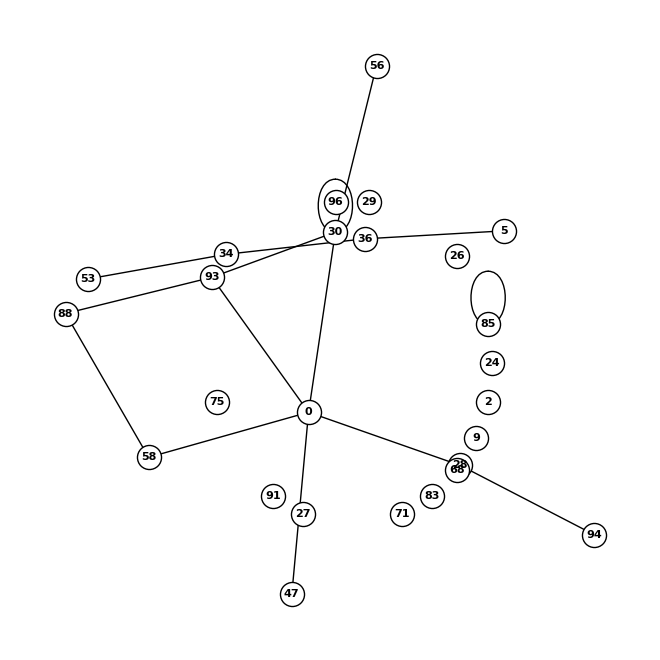

(528, 528, 3) <class 'numpy.ndarray'>


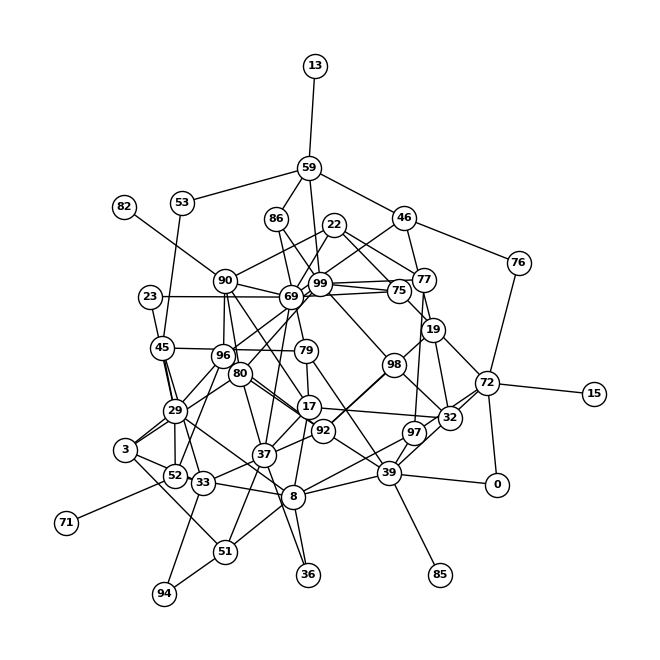

(528, 528, 3) <class 'numpy.ndarray'>


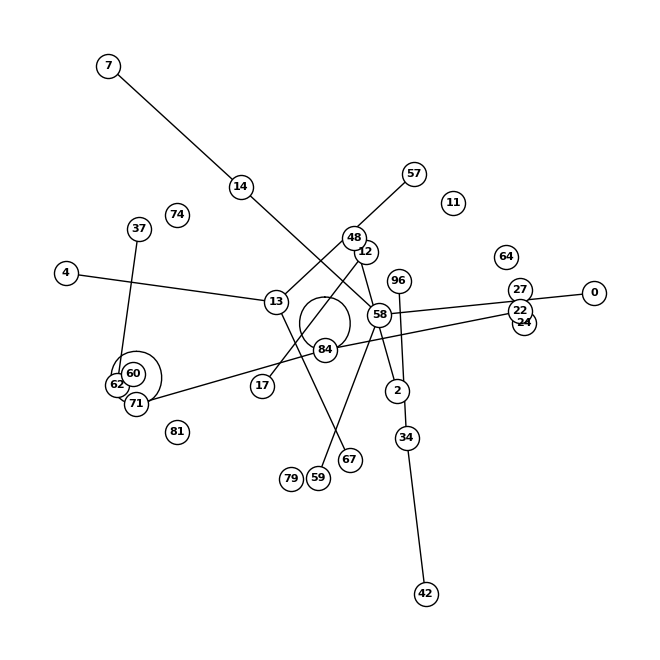

(528, 528, 3) <class 'numpy.ndarray'>


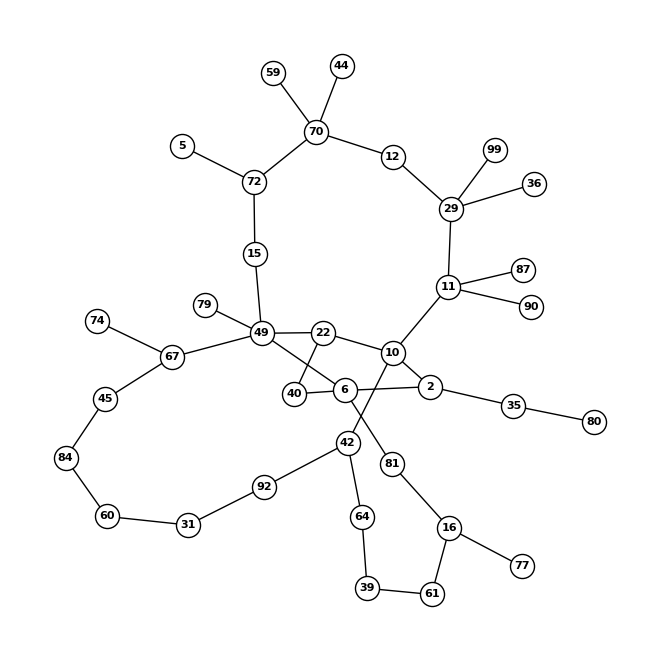

(528, 528, 3) <class 'numpy.ndarray'>


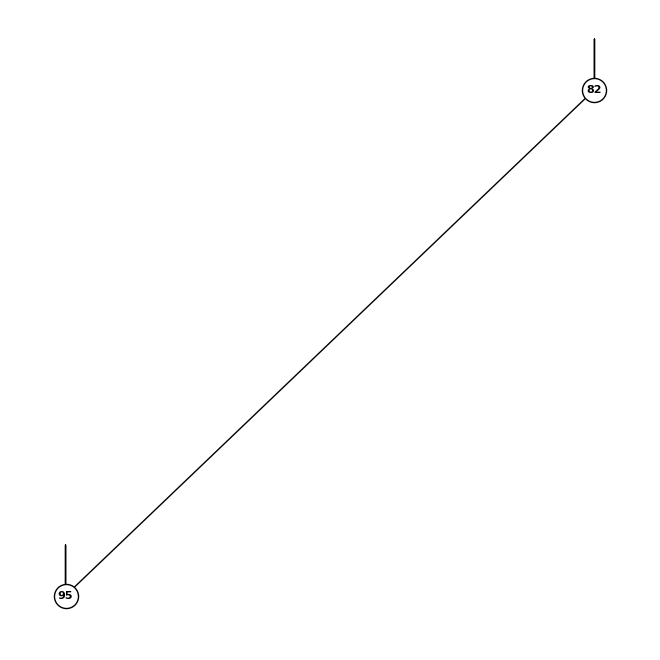

(528, 528, 3) <class 'numpy.ndarray'>


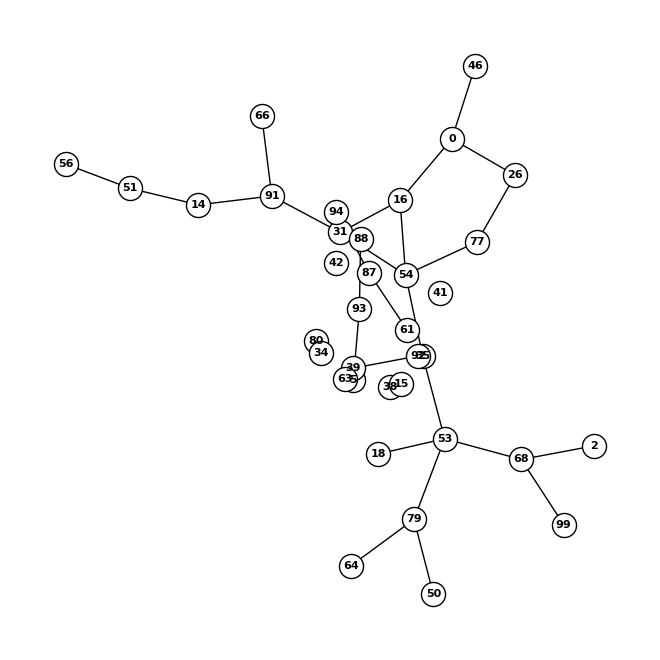

(528, 528, 3) <class 'numpy.ndarray'>


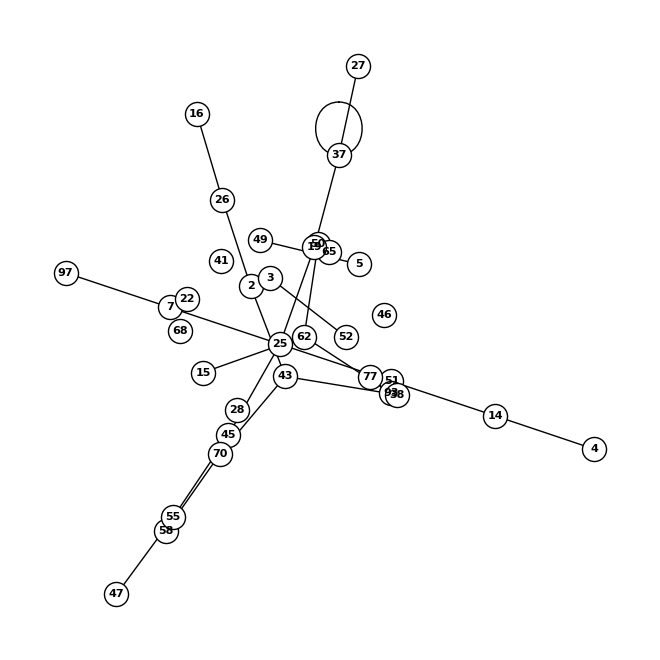

(528, 528, 3) <class 'numpy.ndarray'>


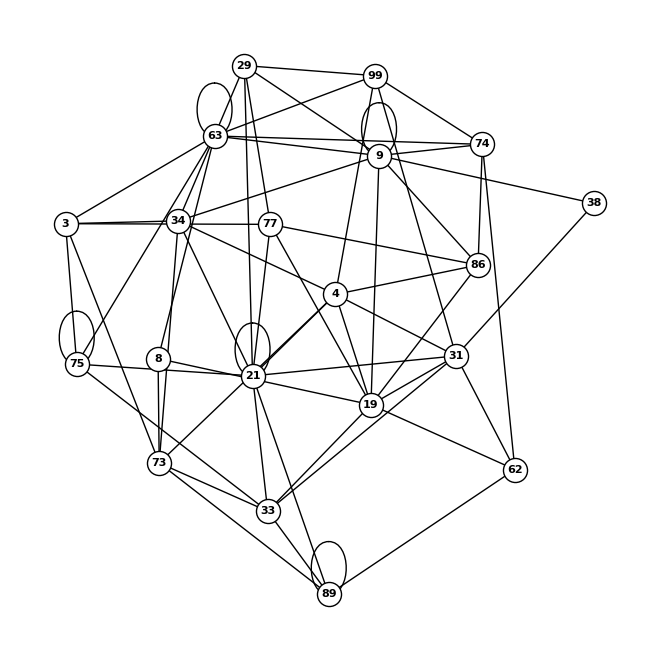

(528, 528, 3) <class 'numpy.ndarray'>


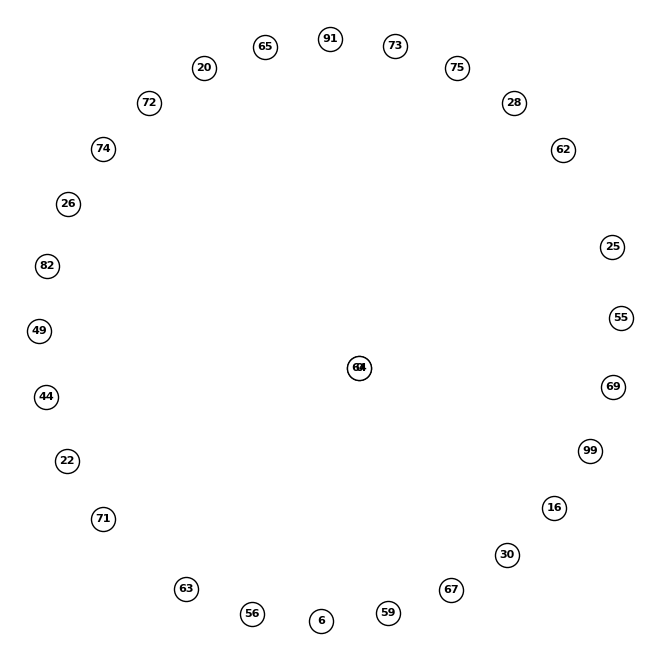

(528, 528, 3) <class 'numpy.ndarray'>


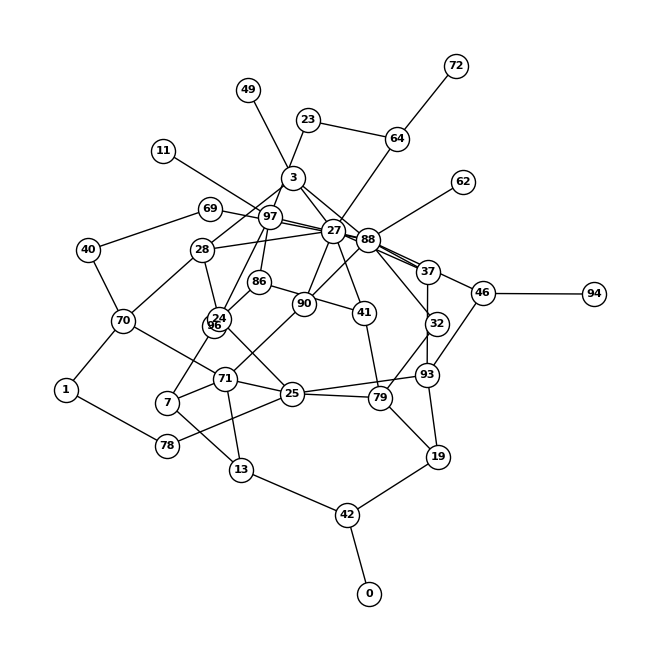

(528, 528, 3) <class 'numpy.ndarray'>


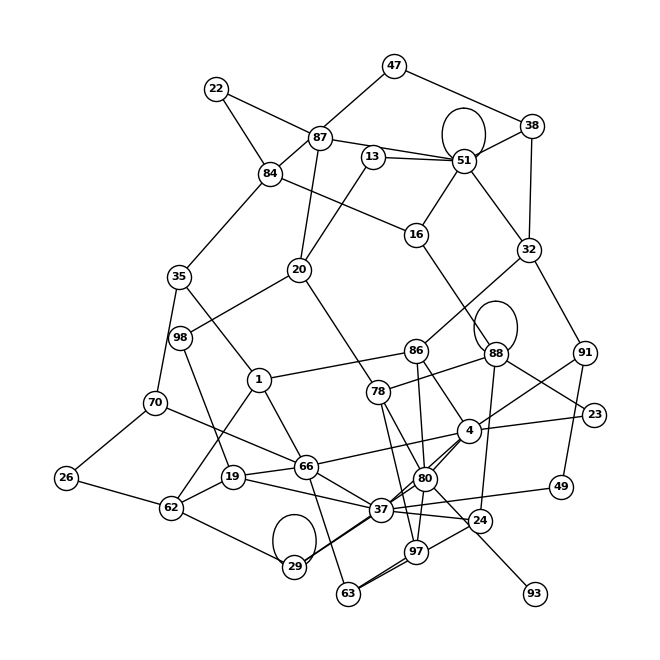

(528, 528, 3) <class 'numpy.ndarray'>


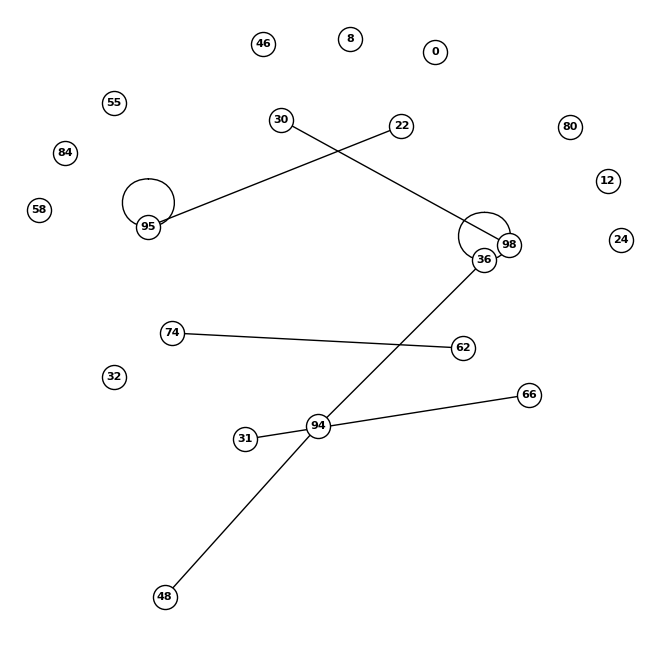

(528, 528, 3) <class 'numpy.ndarray'>


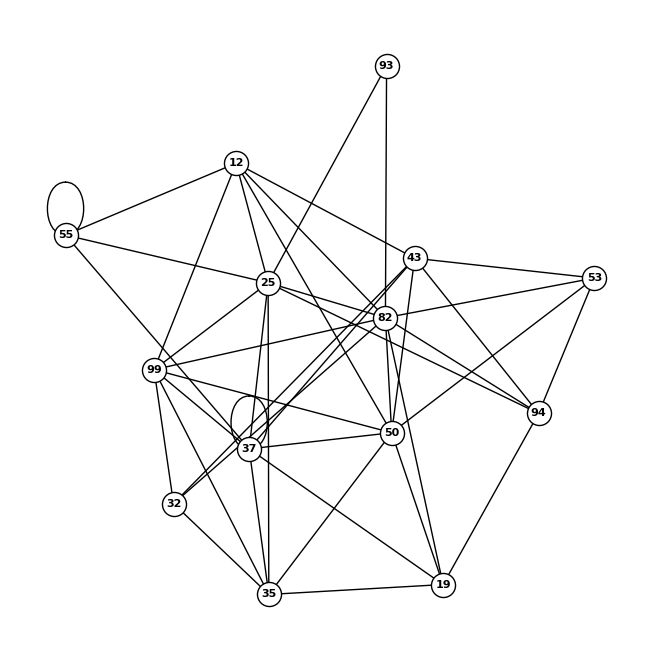

(528, 528, 3) <class 'numpy.ndarray'>


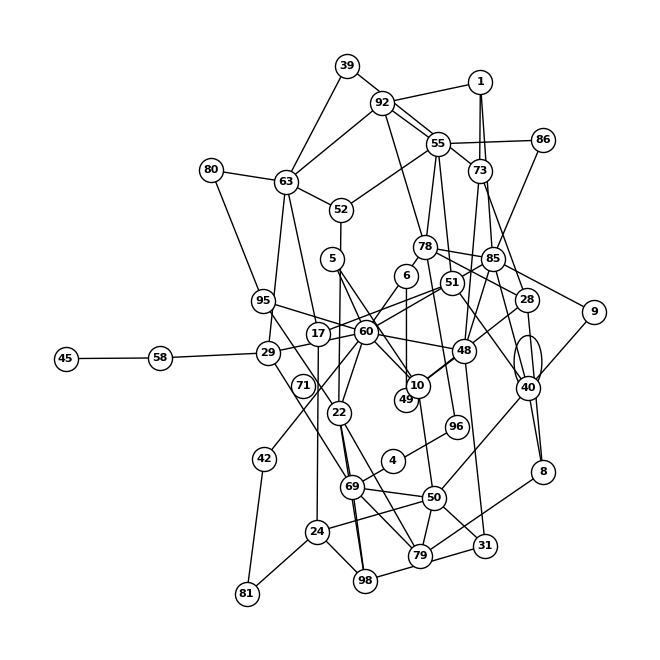

(528, 528, 3) <class 'numpy.ndarray'>


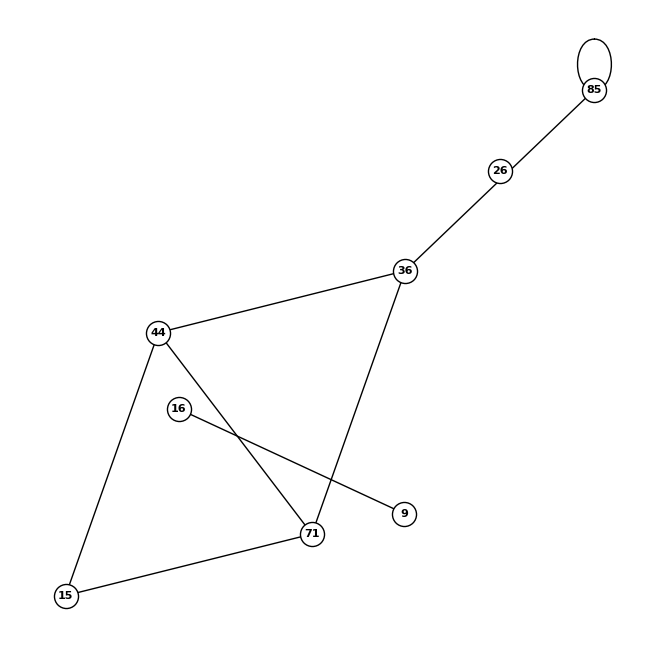

(528, 528, 3) <class 'numpy.ndarray'>


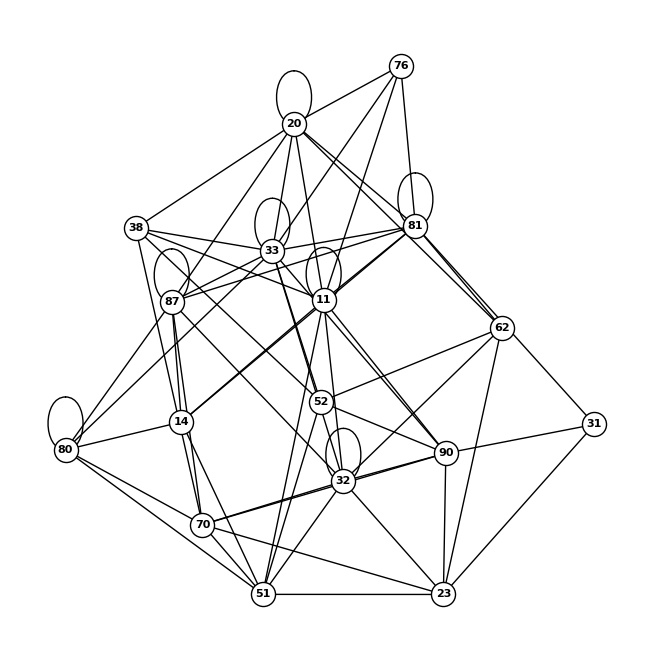

(528, 528, 3) <class 'numpy.ndarray'>


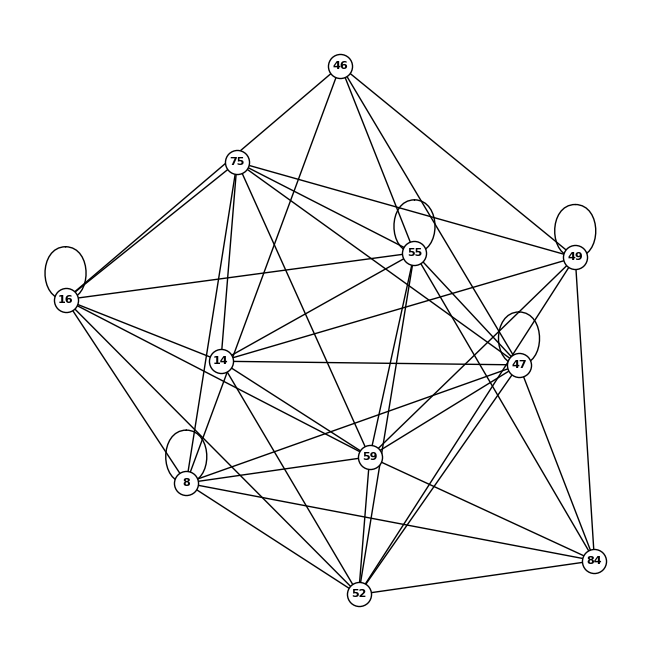

(528, 528, 3) <class 'numpy.ndarray'>


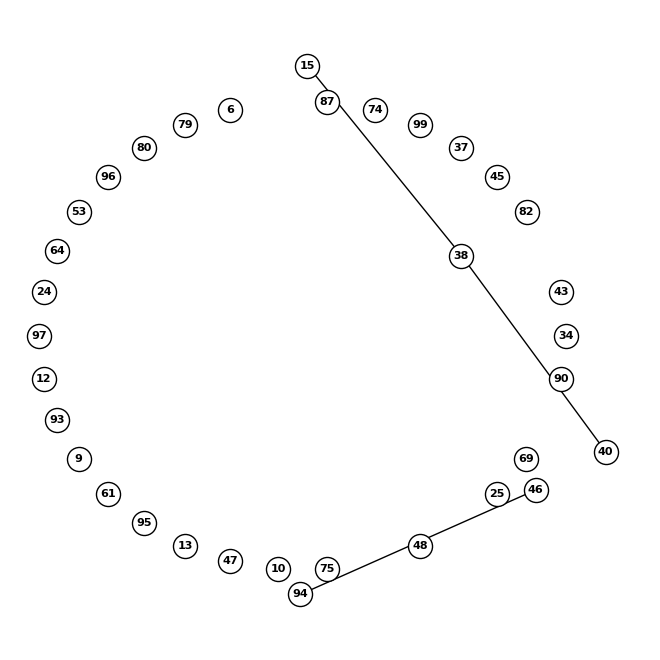

(528, 528, 3) <class 'numpy.ndarray'>


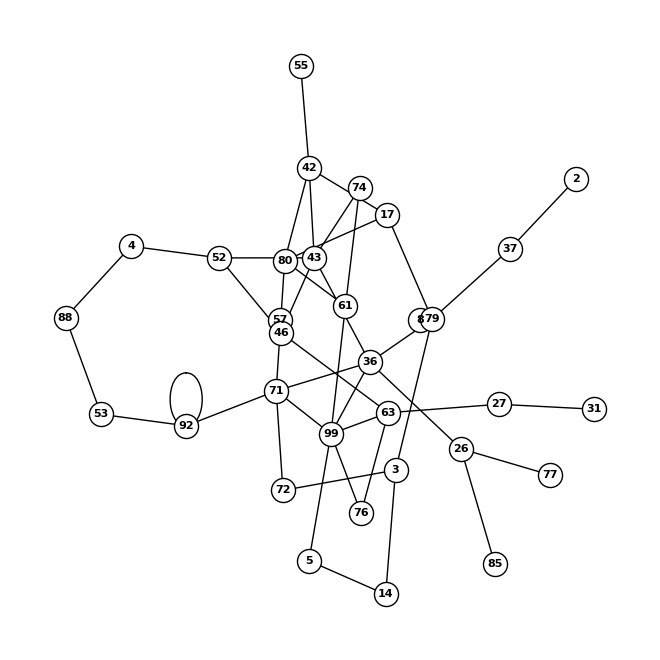

(528, 528, 3) <class 'numpy.ndarray'>


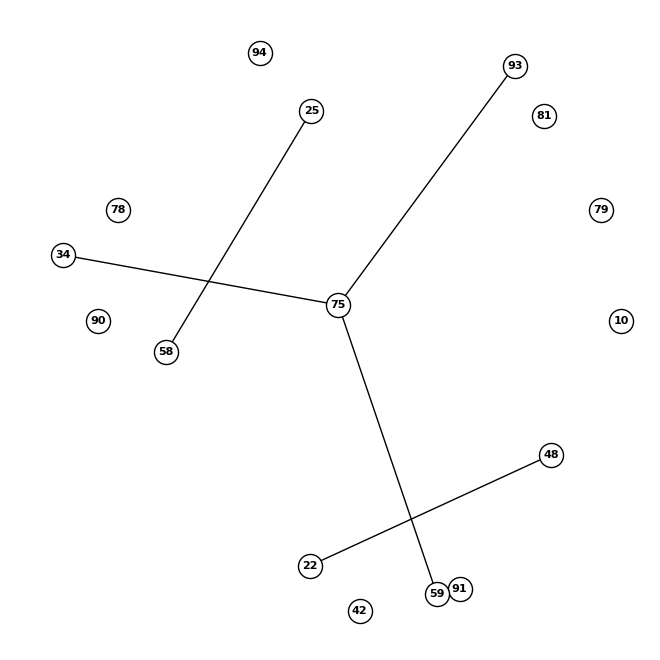

(528, 528, 3) <class 'numpy.ndarray'>


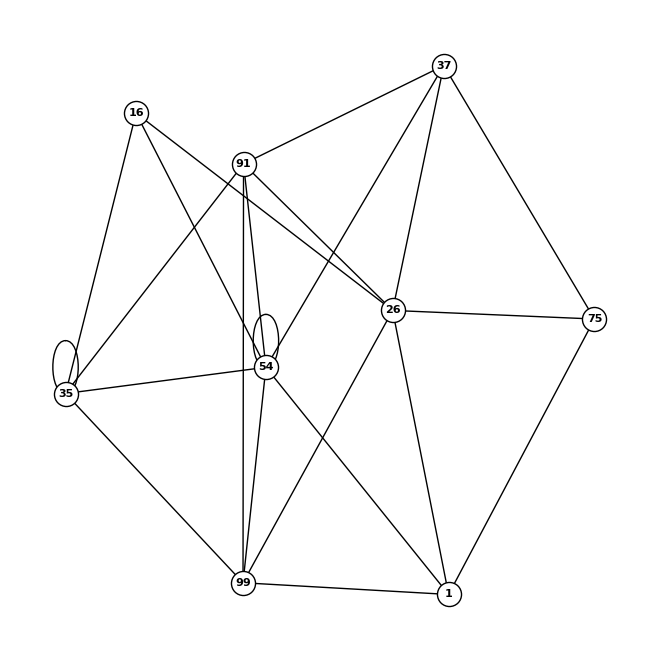

(528, 528, 3) <class 'numpy.ndarray'>


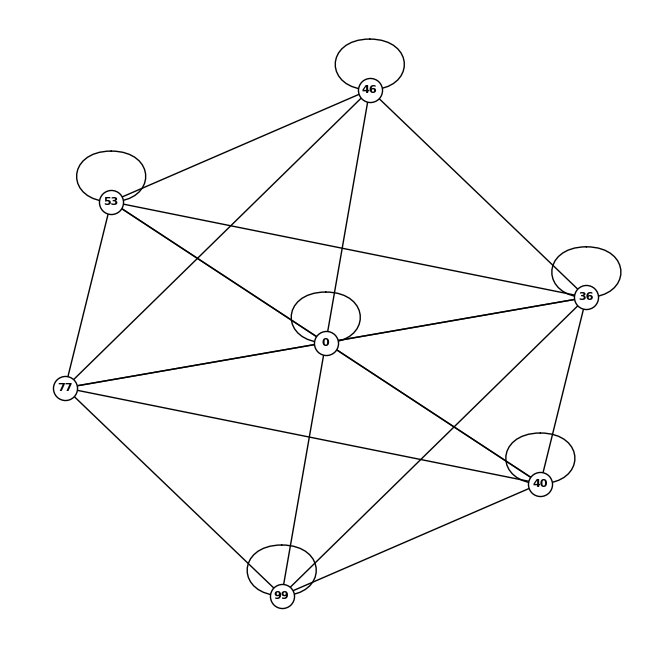

(528, 528, 3) <class 'numpy.ndarray'>


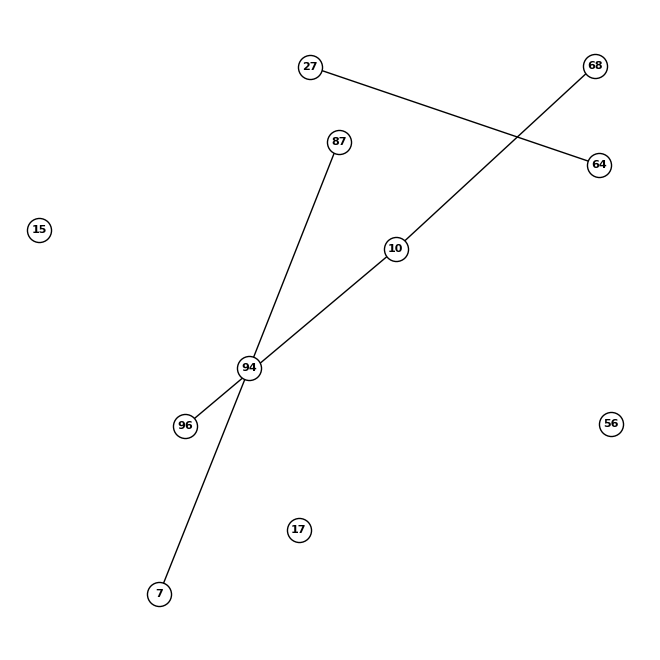

(528, 528, 3) <class 'numpy.ndarray'>


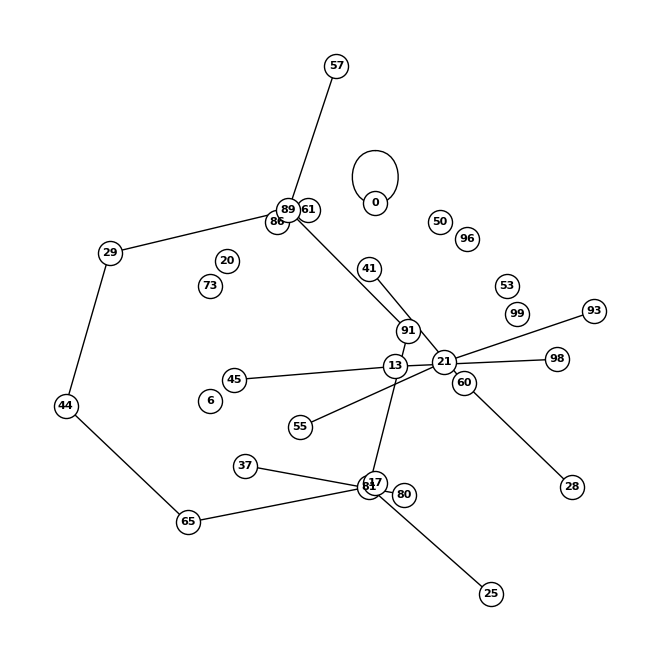

(528, 528, 3) <class 'numpy.ndarray'>


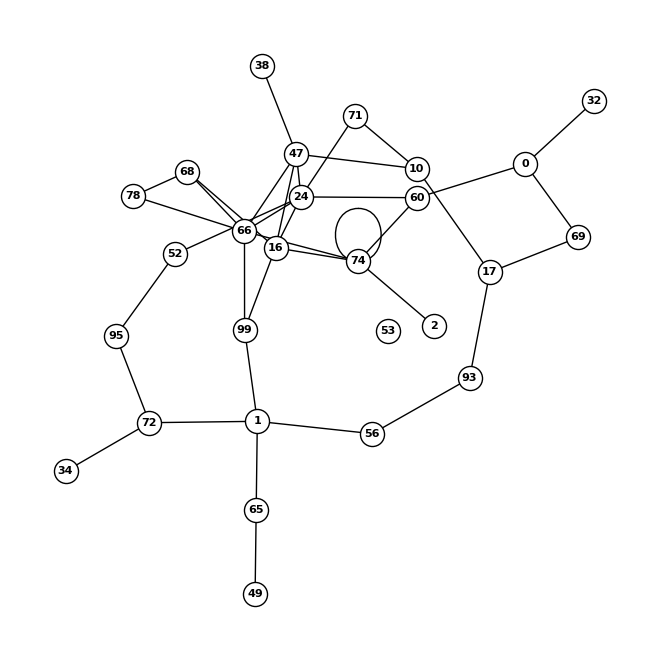

(528, 528, 3) <class 'numpy.ndarray'>


In [20]:
nodes, edges = gen_graphs(50)
for i in range(len(nodes)):
  n = nodes[i]
  e = edges[i]
  path = graph_to_image(n, e, 0)
  arr = image_to_vectors(path)
  print(arr.shape, type(arr))